# 1. Thư viện và dữ liệu

In [125]:
# Import các thư viện
import pandas as pd
import logging
logging.getLogger("cmdstanpy").disabled = True

from src.model.prophet import ProphetModel
from src.processing.aggregate import prepare_level_data

In [126]:
file_path = "../data/time_series_country.csv"
df = pd.read_csv(file_path, sep=",", engine="python")

In [127]:
grid = {
    'changepoint_prior_scale': [0.05, 0.1, 0.2, 0.3, 0.5], # Removed 0
    'n_changepoints': [15, 20, 25],
    'changepoint_range': [0.8, 0.9],
    'holidays_prior_scale': [10.0, 15.0]
}

# 2. Global Level

In [128]:
global_df = prepare_level_data(df, level="global")
global_df

,Year,Total_Deaths,Population,Mortality_Rate
0,2000,16470.0,5.764414e+09,0.285719
1,2001,39212.0,5.742992e+09,0.682780
2,2002,20868.0,5.932354e+09,0.351766
3,2003,113107.0,5.947678e+09,1.901700
4,2004,244611.0,5.914578e+09,4.135731
5,2005,93440.0,6.246842e+09,1.495796
6,2006,29852.0,6.158741e+09,0.484709
7,2007,22377.0,6.339604e+09,0.352972
8,2008,241939.0,6.483756e+09,3.731463
9,2009,15408.0,6.295363e+09,0.244752


========== PROPHET PIPELINE START ==========
Detected outlier years: [2004, 2008, 2010]


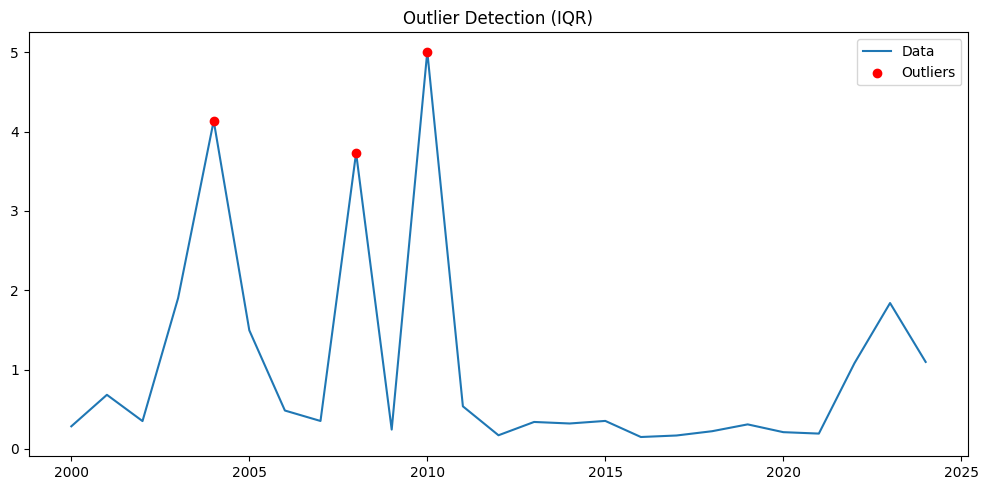

Running grid search...

Best model based on MAE:
changepoint_prior_scale        0.3
n_changepoints                  15
changepoint_range              0.8
holidays_prior_scale          10.0
Model                      Prophet
MAE                          0.311
RMSE                        0.5784
MASE                         0.268
Coverage_90%                   0.8
n_forecasts                     10
Name: 0, dtype: object

Best Prophet parameters:
{'changepoint_prior_scale': np.float64(0.3), 'n_changepoints': np.int64(15), 'changepoint_range': np.float64(0.8), 'holidays_prior_scale': np.float64(10.0)}
========== PIPELINE FINISHED ==========


In [129]:
global_model = ProphetModel(global_df)
results = global_model.run_pipeline_prophet(
    param_grid=grid
)

In [130]:
results["cv_results"]

,changepoint_prior_scale,n_changepoints,changepoint_range,holidays_prior_scale,Model,MAE,RMSE,MASE,Coverage_90%,n_forecasts
0,0.30,15,0.8,10.0,Prophet,0.3110,0.5784,0.2680,0.8,10
1,0.30,20,0.9,15.0,Prophet,0.3113,0.5782,0.2683,0.8,10
2,0.30,25,0.9,15.0,Prophet,0.3113,0.5782,0.2683,0.8,10
3,0.30,15,0.8,15.0,Prophet,0.3117,0.5787,0.2687,0.8,10
4,0.30,15,0.9,15.0,Prophet,0.3117,0.5789,0.2687,0.8,10
5,0.30,25,0.9,10.0,Prophet,0.3119,0.5820,0.2689,0.8,10
6,0.30,20,0.9,10.0,Prophet,0.3119,0.5820,0.2689,0.8,10
7,0.30,20,0.8,10.0,Prophet,0.3122,0.5823,0.2691,0.8,10
8,0.30,20,0.8,15.0,Prophet,0.3122,0.5802,0.2691,0.8,10
9,0.30,25,0.8,10.0,Prophet,0.3122,0.5823,0.2691,0.8,10


In [131]:
results["best_params"]

{'changepoint_prior_scale': np.float64(0.3),
 'n_changepoints': np.int64(15),
 'changepoint_range': np.float64(0.8),
 'holidays_prior_scale': np.float64(10.0)}

In [132]:
results["best_model_summary"]

,changepoint_prior_scale,n_changepoints,changepoint_range,holidays_prior_scale,Model,MAE,RMSE,MASE,Coverage_90%,n_forecasts
0,0.3,15,0.8,10.0,Prophet,0.311,0.5784,0.268,0.8,10


# 3. Region Level

## 3.1. South Asia

In [133]:
south_asia = prepare_level_data(df,level='region', filter='South Asia')
south_asia

,Year,Total_Deaths,Population,Mortality_Rate
0,2000,4522.0,1.478332e+09,0.305885
1,2001,22686.0,1.506259e+09,1.506116
2,2002,9072.0,1.534281e+09,0.591287
3,2003,30776.0,1.562026e+09,1.970261
4,2004,54669.0,1.591054e+09,3.436025
5,2005,80956.0,1.617604e+09,5.004685
6,2006,2739.0,1.644702e+09,0.166535
7,2007,9435.0,1.671277e+09,0.564539
8,2008,3687.0,1.696521e+09,0.217327
9,2009,3586.0,1.723322e+09,0.208086


========== PROPHET PIPELINE START ==========
Detected outlier years: [2001, 2003, 2004, 2005]


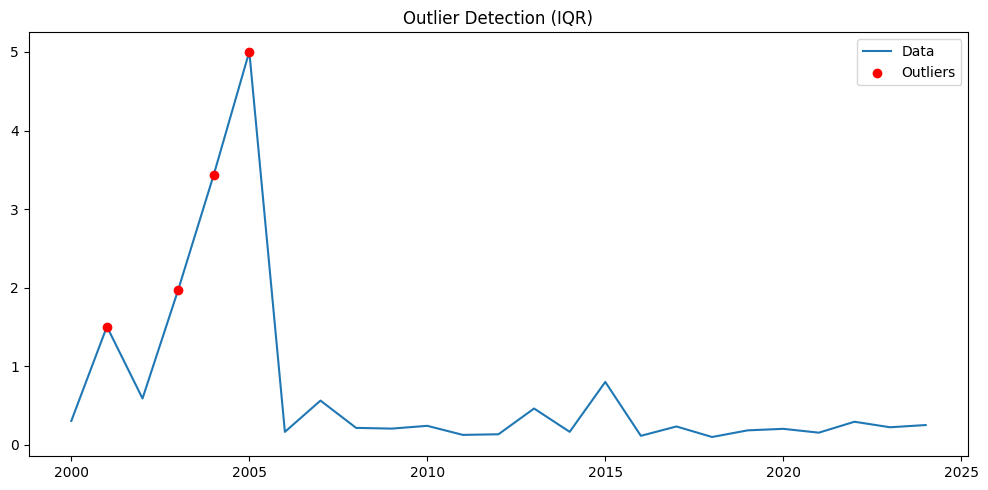

Running grid search...

Best model based on MAE:
changepoint_prior_scale        0.5
n_changepoints                  15
changepoint_range              0.9
holidays_prior_scale          15.0
Model                      Prophet
MAE                         0.1476
RMSE                        0.2426
MASE                        0.2382
Coverage_90%                   1.0
n_forecasts                     10
Name: 0, dtype: object

Best Prophet parameters:
{'changepoint_prior_scale': np.float64(0.5), 'n_changepoints': np.int64(15), 'changepoint_range': np.float64(0.9), 'holidays_prior_scale': np.float64(15.0)}
========== PIPELINE FINISHED ==========


In [134]:
south_asia_model = ProphetModel(south_asia)
results = south_asia_model.run_pipeline_prophet(
    param_grid=grid
)


In [135]:
results["cv_results"]

,changepoint_prior_scale,n_changepoints,changepoint_range,holidays_prior_scale,Model,MAE,RMSE,MASE,Coverage_90%,n_forecasts
0,0.50,15,0.9,15.0,Prophet,0.1476,0.2426,0.2382,1.0,10
1,0.50,15,0.9,10.0,Prophet,0.1479,0.2426,0.2388,1.0,10
2,0.50,20,0.9,15.0,Prophet,0.1511,0.2437,0.2439,1.0,10
3,0.50,25,0.9,15.0,Prophet,0.1511,0.2437,0.2439,1.0,10
4,0.50,25,0.9,10.0,Prophet,0.1513,0.2435,0.2442,1.0,10
5,0.50,20,0.9,10.0,Prophet,0.1513,0.2435,0.2442,1.0,10
6,0.50,15,0.8,15.0,Prophet,0.1518,0.2436,0.2451,1.0,10
7,0.50,20,0.8,15.0,Prophet,0.1520,0.2438,0.2454,1.0,10
8,0.50,25,0.8,15.0,Prophet,0.1520,0.2438,0.2454,1.0,10
9,0.50,15,0.8,10.0,Prophet,0.1523,0.2447,0.2458,1.0,10


In [136]:
results["best_params"]

{'changepoint_prior_scale': np.float64(0.5),
 'n_changepoints': np.int64(15),
 'changepoint_range': np.float64(0.9),
 'holidays_prior_scale': np.float64(15.0)}

In [137]:
results["best_model_summary"]

,changepoint_prior_scale,n_changepoints,changepoint_range,holidays_prior_scale,Model,MAE,RMSE,MASE,Coverage_90%,n_forecasts
0,0.5,15,0.9,15.0,Prophet,0.1476,0.2426,0.2382,1.0,10


## 3.2. Europe and Central Asia

In [138]:
europe_central_asia= prepare_level_data(df,level='region', filter='Europe and Central Asia')
europe_central_asia

,Year,Total_Deaths,Population,Mortality_Rate
0,2000,674.0,635050252.0,0.106133
1,2001,1320.0,561393893.0,0.235129
2,2002,1010.0,600505732.0,0.168192
3,2003,72345.0,650391419.0,11.123302
4,2004,251.0,589578346.0,0.042573
5,2005,1033.0,752877411.0,0.137207
6,2006,4608.0,638495995.0,0.721696
7,2007,871.0,705687931.0,0.123426
8,2008,283.0,637477698.0,0.044394
9,2009,847.0,511110743.0,0.165718


========== PROPHET PIPELINE START ==========
Detected outlier years: [2003, 2010, 2022, 2023, 2024]


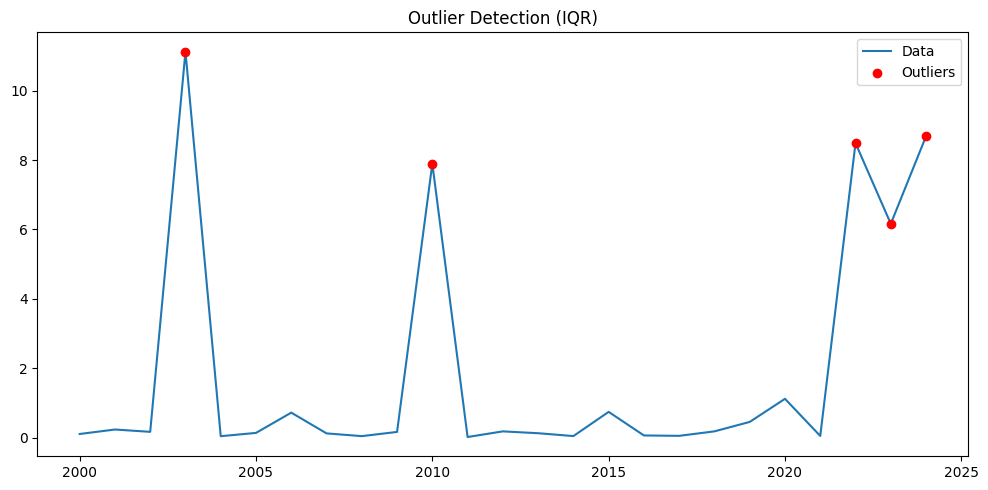

Running grid search...

Best model based on MAE:
changepoint_prior_scale       0.05
n_changepoints                  20
changepoint_range              0.8
holidays_prior_scale          15.0
Model                      Prophet
MAE                         0.7477
RMSE                        1.0884
MASE                        0.3181
Coverage_90%                   0.6
n_forecasts                     10
Name: 0, dtype: object

Best Prophet parameters:
{'changepoint_prior_scale': np.float64(0.05), 'n_changepoints': np.int64(20), 'changepoint_range': np.float64(0.8), 'holidays_prior_scale': np.float64(15.0)}
========== PIPELINE FINISHED ==========


In [139]:
europe_central_asia_model = ProphetModel(europe_central_asia)
results = europe_central_asia_model.run_pipeline_prophet(
    param_grid=grid
)

In [140]:
results["cv_results"]

,changepoint_prior_scale,n_changepoints,changepoint_range,holidays_prior_scale,Model,MAE,RMSE,MASE,Coverage_90%,n_forecasts
0,0.05,20,0.8,15.0,Prophet,0.7477,1.0884,0.3181,0.6,10
1,0.05,25,0.8,15.0,Prophet,0.7477,1.0884,0.3181,0.7,10
2,0.05,25,0.9,15.0,Prophet,0.7478,1.0872,0.3181,0.7,10
3,0.05,20,0.9,15.0,Prophet,0.7478,1.0872,0.3181,0.6,10
4,0.05,15,0.8,15.0,Prophet,0.7479,1.0888,0.3181,0.7,10
5,0.05,15,0.9,10.0,Prophet,0.7481,1.0894,0.3183,0.6,10
6,0.05,15,0.8,10.0,Prophet,0.7495,1.0898,0.3188,0.6,10
7,0.05,15,0.9,15.0,Prophet,0.7499,1.0905,0.3190,0.7,10
8,0.05,25,0.9,10.0,Prophet,0.7502,1.0908,0.3191,0.7,10
9,0.05,20,0.9,10.0,Prophet,0.7502,1.0908,0.3191,0.6,10


In [141]:
results["best_params"]

{'changepoint_prior_scale': np.float64(0.05),
 'n_changepoints': np.int64(20),
 'changepoint_range': np.float64(0.8),
 'holidays_prior_scale': np.float64(15.0)}

In [142]:
results["best_model_summary"]

,changepoint_prior_scale,n_changepoints,changepoint_range,holidays_prior_scale,Model,MAE,RMSE,MASE,Coverage_90%,n_forecasts
0,0.05,20,0.8,15.0,Prophet,0.7477,1.0884,0.3181,0.6,10


## 3.3. Middle East and North Africa

In [143]:
middleeast_northafrica= prepare_level_data(df,level='region', filter='Middle East and North Africa')
middleeast_northafrica

,Year,Total_Deaths,Population,Mortality_Rate
0,2000,475.0,289425624.0,0.164118
1,2001,1114.0,213241017.0,0.522414
2,2002,466.0,298121983.0,0.156312
3,2003,2693.0,252715429.0,1.065625
4,2004,852.0,287324471.0,0.296529
5,2005,871.0,211311838.0,0.412187
6,2006,1326.0,242109435.0,0.547686
7,2007,1063.0,208750060.0,0.509221
8,2008,343.0,332683716.0,0.103101
9,2009,346.0,277745469.0,0.124574


========== PROPHET PIPELINE START ==========
Detected outlier years: [2003, 2023, 2024]


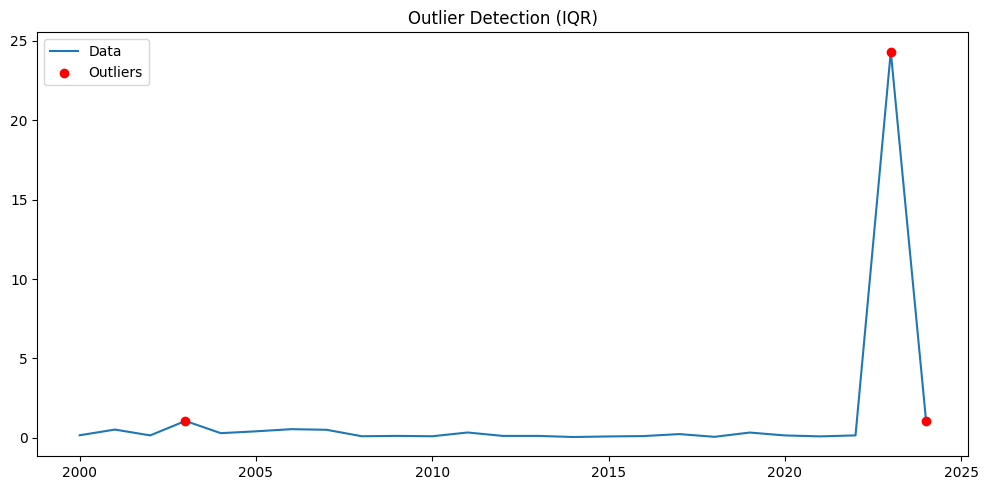

Running grid search...

Best model based on MAE:
changepoint_prior_scale       0.05
n_changepoints                  20
changepoint_range              0.8
holidays_prior_scale          15.0
Model                      Prophet
MAE                         3.7768
RMSE                        8.5912
MASE                        1.7435
Coverage_90%                   0.7
n_forecasts                     10
Name: 0, dtype: object

Best Prophet parameters:
{'changepoint_prior_scale': np.float64(0.05), 'n_changepoints': np.int64(20), 'changepoint_range': np.float64(0.8), 'holidays_prior_scale': np.float64(15.0)}
========== PIPELINE FINISHED ==========


In [144]:
middleeast_northafrica_model = ProphetModel(middleeast_northafrica)
results = middleeast_northafrica_model.run_pipeline_prophet(
    param_grid=grid
)

In [145]:
results["cv_results"]

,changepoint_prior_scale,n_changepoints,changepoint_range,holidays_prior_scale,Model,MAE,RMSE,MASE,Coverage_90%,n_forecasts
0,0.05,20,0.8,15.0,Prophet,3.7768,8.5912,1.7435,0.7,10
1,0.05,25,0.8,15.0,Prophet,3.7768,8.5912,1.7435,0.7,10
2,0.05,25,0.9,15.0,Prophet,3.7769,8.5912,1.7436,0.7,10
3,0.05,20,0.9,15.0,Prophet,3.7769,8.5912,1.7436,0.7,10
4,0.10,15,0.8,15.0,Prophet,3.7787,8.5941,1.7444,0.7,10
5,0.10,20,0.8,15.0,Prophet,3.7797,8.5962,1.7448,0.7,10
6,0.10,25,0.8,15.0,Prophet,3.7797,8.5962,1.7448,0.7,10
7,0.10,25,0.9,15.0,Prophet,3.7799,8.5963,1.7450,0.7,10
8,0.10,20,0.9,15.0,Prophet,3.7799,8.5963,1.7450,0.7,10
9,0.20,20,0.9,10.0,Prophet,3.7808,8.5981,1.7454,0.7,10


In [146]:
results["best_params"]

{'changepoint_prior_scale': np.float64(0.05),
 'n_changepoints': np.int64(20),
 'changepoint_range': np.float64(0.8),
 'holidays_prior_scale': np.float64(15.0)}

In [147]:
results["best_model_summary"]

,changepoint_prior_scale,n_changepoints,changepoint_range,holidays_prior_scale,Model,MAE,RMSE,MASE,Coverage_90%,n_forecasts
0,0.05,20,0.8,15.0,Prophet,3.7768,8.5912,1.7435,0.7,10


## 3.4. East Asia and Pacific

In [148]:
eastasia_pacific = prepare_level_data(df,level='region', filter='East Asia and Pacific')
eastasia_pacific

,Year,Total_Deaths,Population,Mortality_Rate
0,2000,3379.0,1.971891e+09,0.171358
1,2001,3093.0,2.032373e+09,0.152187
2,2002,2928.0,2.049243e+09,0.142882
3,2003,2387.0,1.984705e+09,0.120270
4,2004,178682.0,2.073972e+09,8.615449
5,2005,3198.0,2.089030e+09,0.153085
6,2006,13857.0,2.105341e+09,0.658183
7,2007,3928.0,2.121472e+09,0.185154
8,2008,228537.0,2.108964e+09,10.836459
9,2009,4894.0,2.089570e+09,0.234211


========== PROPHET PIPELINE START ==========
Detected outlier years: [2004, 2008, 2011]


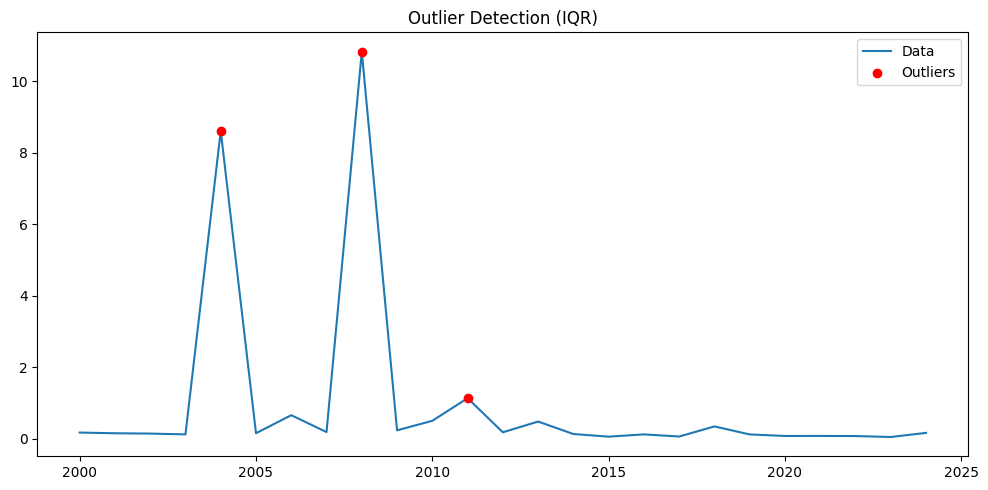

Running grid search...

Best model based on MAE:
changepoint_prior_scale       0.05
n_changepoints                  20
changepoint_range              0.8
holidays_prior_scale          10.0
Model                      Prophet
MAE                         0.3277
RMSE                        0.3494
MASE                        0.1844
Coverage_90%                   1.0
n_forecasts                     10
Name: 0, dtype: object

Best Prophet parameters:
{'changepoint_prior_scale': np.float64(0.05), 'n_changepoints': np.int64(20), 'changepoint_range': np.float64(0.8), 'holidays_prior_scale': np.float64(10.0)}
========== PIPELINE FINISHED ==========


In [149]:
eastasia_pacific_model = ProphetModel(eastasia_pacific)
results = eastasia_pacific_model.run_pipeline_prophet(
    param_grid=grid
)

In [150]:
results["cv_results"]

,changepoint_prior_scale,n_changepoints,changepoint_range,holidays_prior_scale,Model,MAE,RMSE,MASE,Coverage_90%,n_forecasts
0,0.05,20,0.8,10.0,Prophet,0.3277,0.3494,0.1844,1.0,10
1,0.05,25,0.8,10.0,Prophet,0.3277,0.3494,0.1844,1.0,10
2,0.05,15,0.8,10.0,Prophet,0.3280,0.3496,0.1846,1.0,10
3,0.05,20,0.8,15.0,Prophet,0.3290,0.3502,0.1852,1.0,10
4,0.05,25,0.8,15.0,Prophet,0.3290,0.3502,0.1852,1.0,10
5,0.05,15,0.9,15.0,Prophet,0.3292,0.3507,0.1853,1.0,10
6,0.50,15,0.9,15.0,Prophet,0.3296,0.3524,0.1855,1.0,10
7,0.50,15,0.9,10.0,Prophet,0.3299,0.3527,0.1857,1.0,10
8,0.50,20,0.8,10.0,Prophet,0.3305,0.3527,0.1860,1.0,10
9,0.50,25,0.8,10.0,Prophet,0.3305,0.3527,0.1860,1.0,10


In [151]:
results["best_params"]

{'changepoint_prior_scale': np.float64(0.05),
 'n_changepoints': np.int64(20),
 'changepoint_range': np.float64(0.8),
 'holidays_prior_scale': np.float64(10.0)}

In [152]:
results["best_model_summary"]

,changepoint_prior_scale,n_changepoints,changepoint_range,holidays_prior_scale,Model,MAE,RMSE,MASE,Coverage_90%,n_forecasts
0,0.05,20,0.8,10.0,Prophet,0.3277,0.3494,0.1844,1.0,10


## 3.5. Sub-Saharan Africa

In [153]:
subsaharan_africa = prepare_level_data(df,level='region', filter='Sub-Saharan Africa')
subsaharan_africa

,Year,Total_Deaths,Population,Mortality_Rate
0,2000,6442.0,5.731780e+08,1.123909
1,2001,8971.0,6.201723e+08,1.446533
2,2002,6075.0,6.043178e+08,1.005266
3,2003,3188.0,6.521137e+08,0.488872
4,2004,3318.0,5.338604e+08,0.621511
5,2005,2962.0,7.124577e+08,0.415744
6,2006,6644.0,6.648678e+08,0.999296
7,2007,4959.0,7.753941e+08,0.639546
8,2008,7149.0,8.054151e+08,0.887617
9,2009,4270.0,8.112880e+08,0.526324


========== PROPHET PIPELINE START ==========
Detected outlier years: [2010, 2014]


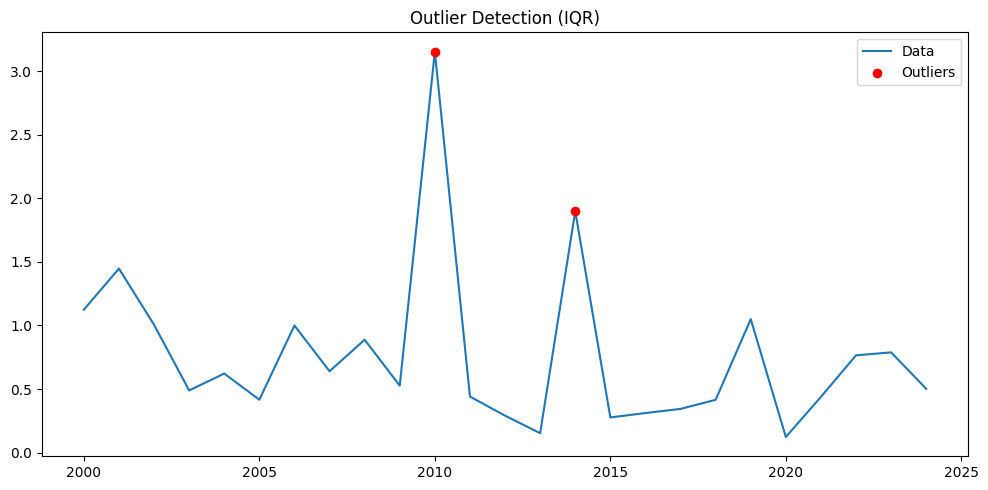

Running grid search...

Best model based on MAE:
changepoint_prior_scale        0.2
n_changepoints                  20
changepoint_range              0.8
holidays_prior_scale          15.0
Model                      Prophet
MAE                         0.3452
RMSE                        0.4095
MASE                        0.5591
Coverage_90%                   0.9
n_forecasts                     10
Name: 0, dtype: object

Best Prophet parameters:
{'changepoint_prior_scale': np.float64(0.2), 'n_changepoints': np.int64(20), 'changepoint_range': np.float64(0.8), 'holidays_prior_scale': np.float64(15.0)}
========== PIPELINE FINISHED ==========


In [154]:
subsaharan_africa_model = ProphetModel(subsaharan_africa)
results = subsaharan_africa_model.run_pipeline_prophet(
    param_grid=grid
)

In [155]:
results["cv_results"]

,changepoint_prior_scale,n_changepoints,changepoint_range,holidays_prior_scale,Model,MAE,RMSE,MASE,Coverage_90%,n_forecasts
0,0.20,20,0.8,15.0,Prophet,0.3452,0.4095,0.5591,0.9,10
1,0.20,25,0.8,15.0,Prophet,0.3452,0.4095,0.5591,0.9,10
2,0.20,15,0.8,15.0,Prophet,0.3455,0.4098,0.5596,0.9,10
3,0.20,20,0.9,15.0,Prophet,0.3499,0.4121,0.5668,0.9,10
4,0.20,25,0.9,15.0,Prophet,0.3499,0.4121,0.5668,0.9,10
5,0.20,15,0.8,10.0,Prophet,0.3537,0.4156,0.5730,0.9,10
6,0.20,20,0.8,10.0,Prophet,0.3538,0.4156,0.5730,0.9,10
7,0.20,25,0.8,10.0,Prophet,0.3538,0.4156,0.5730,0.9,10
8,0.20,15,0.9,15.0,Prophet,0.3540,0.4171,0.5734,0.9,10
9,0.20,15,0.9,10.0,Prophet,0.3543,0.4172,0.5738,0.9,10


In [156]:
results["best_params"]

{'changepoint_prior_scale': np.float64(0.2),
 'n_changepoints': np.int64(20),
 'changepoint_range': np.float64(0.8),
 'holidays_prior_scale': np.float64(15.0)}

In [157]:
results["best_model_summary"]

,changepoint_prior_scale,n_changepoints,changepoint_range,holidays_prior_scale,Model,MAE,RMSE,MASE,Coverage_90%,n_forecasts
0,0.2,20,0.8,15.0,Prophet,0.3452,0.4095,0.5591,0.9,10


## 3.6. Latin America and Caribbean

In [158]:
america_caribbean = prepare_level_data(df, level='region', filter='Latin America and Caribbean')
america_caribbean

,Year,Total_Deaths,Population,Mortality_Rate
0,2000,805.0,503689389.0,0.159821
1,2001,1863.0,493563164.0,0.377459
2,2002,871.0,526900614.0,0.165306
3,2003,1476.0,523913306.0,0.281726
4,2004,6620.0,514044654.0,1.287826
5,2005,2443.0,535800832.0,0.455953
6,2006,339.0,532272988.0,0.063689
7,2007,1763.0,522903587.0,0.337156
8,2008,1637.0,565354218.0,0.289553
9,2009,1318.0,541924117.0,0.243207


========== PROPHET PIPELINE START ==========
Detected outlier years: [2004, 2010]


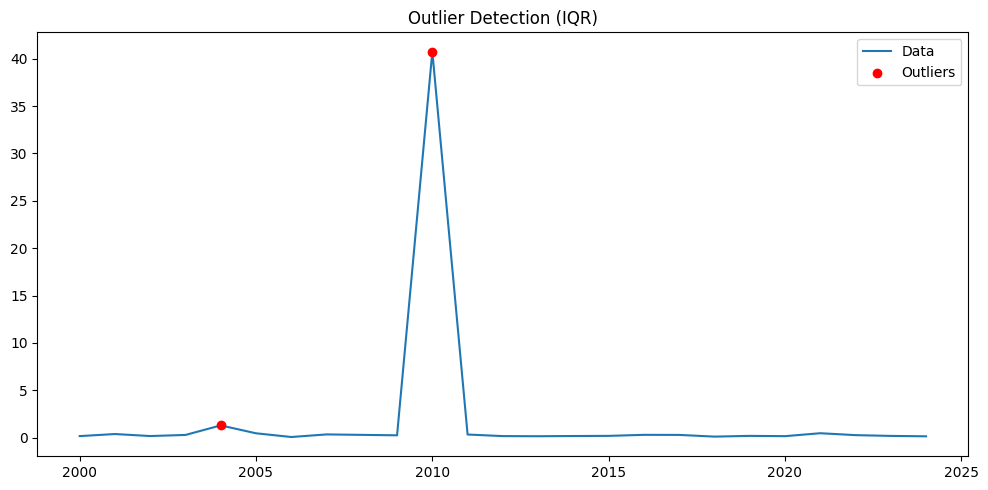

Running grid search...

Best model based on MAE:
changepoint_prior_scale        0.5
n_changepoints                  20
changepoint_range              0.9
holidays_prior_scale          15.0
Model                      Prophet
MAE                         1.0791
RMSE                        1.5915
MASE                        0.3035
Coverage_90%                   1.0
n_forecasts                     10
Name: 0, dtype: object

Best Prophet parameters:
{'changepoint_prior_scale': np.float64(0.5), 'n_changepoints': np.int64(20), 'changepoint_range': np.float64(0.9), 'holidays_prior_scale': np.float64(15.0)}
========== PIPELINE FINISHED ==========


In [159]:
america_caribbean_model = ProphetModel(america_caribbean)
results = america_caribbean_model.run_pipeline_prophet(
    param_grid=grid
)

In [160]:
results["cv_results"]

,changepoint_prior_scale,n_changepoints,changepoint_range,holidays_prior_scale,Model,MAE,RMSE,MASE,Coverage_90%,n_forecasts
0,0.50,20,0.9,15.0,Prophet,1.0791,1.5915,0.3035,1.0,10
1,0.50,25,0.9,15.0,Prophet,1.0791,1.5915,0.3035,1.0,10
2,0.50,25,0.8,15.0,Prophet,1.0792,1.5870,0.3035,1.0,10
3,0.50,20,0.8,15.0,Prophet,1.0792,1.5870,0.3035,1.0,10
4,0.50,15,0.8,15.0,Prophet,1.0809,1.5871,0.3040,1.0,10
5,0.50,15,0.9,10.0,Prophet,1.0820,1.5866,0.3043,1.0,10
6,0.50,15,0.8,10.0,Prophet,1.0823,1.5915,0.3044,1.0,10
7,0.50,20,0.9,10.0,Prophet,1.0839,1.5869,0.3049,1.0,10
8,0.50,25,0.9,10.0,Prophet,1.0839,1.5869,0.3049,1.0,10
9,0.50,15,0.9,15.0,Prophet,1.0863,1.5930,0.3055,1.0,10


In [161]:
results["best_params"]

{'changepoint_prior_scale': np.float64(0.5),
 'n_changepoints': np.int64(20),
 'changepoint_range': np.float64(0.9),
 'holidays_prior_scale': np.float64(15.0)}

In [162]:
results["best_model_summary"]

,changepoint_prior_scale,n_changepoints,changepoint_range,holidays_prior_scale,Model,MAE,RMSE,MASE,Coverage_90%,n_forecasts
0,0.5,20,0.9,15.0,Prophet,1.0791,1.5915,0.3035,1.0,10


## 3.7. North America

In [163]:
north_america = prepare_level_data(df, level='region', filter='North America')
north_america

,Year,Total_Deaths,Population,Mortality_Rate
0,2000,173.0,312848141.0,0.055298
1,2001,165.0,315989810.0,0.052217
2,2002,446.0,318984392.0,0.139819
3,2003,242.0,321812780.0,0.075199
4,2004,219.0,324744105.0,0.067438
5,2005,1977.0,327759331.0,0.603186
6,2006,339.0,330951105.0,0.102432
7,2007,358.0,334120093.0,0.107147
8,2008,303.0,337341264.0,0.089820
9,2009,147.0,340401598.0,0.043184


========== PROPHET PIPELINE START ==========
Detected outlier years: [2005, 2021, 2024]


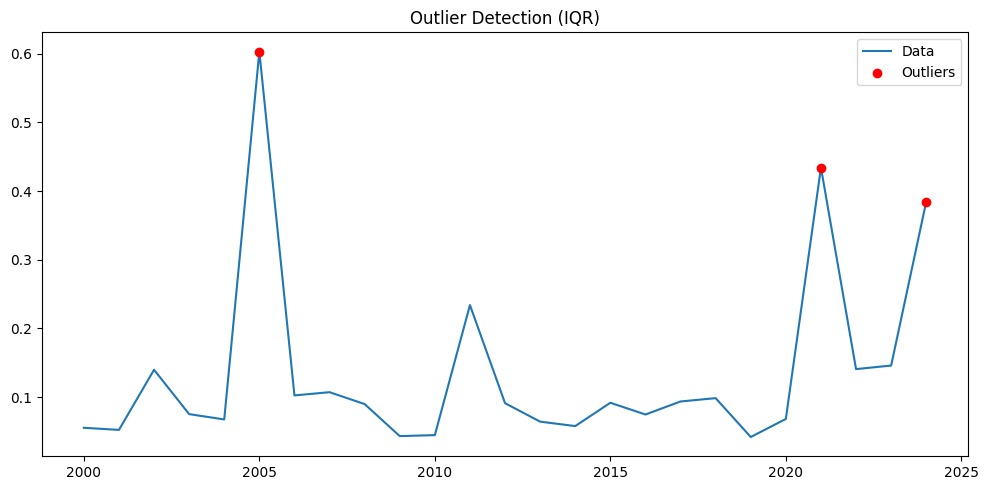

Running grid search...

Best model based on MAE:
changepoint_prior_scale       0.05
n_changepoints                  15
changepoint_range              0.8
holidays_prior_scale          10.0
Model                      Prophet
MAE                         0.0543
RMSE                        0.0765
MASE                         0.483
Coverage_90%                   0.7
n_forecasts                     10
Name: 0, dtype: object

Best Prophet parameters:
{'changepoint_prior_scale': np.float64(0.05), 'n_changepoints': np.int64(15), 'changepoint_range': np.float64(0.8), 'holidays_prior_scale': np.float64(10.0)}
========== PIPELINE FINISHED ==========


In [164]:
north_america_model = ProphetModel(north_america)
results = north_america_model.run_pipeline_prophet(
    param_grid=grid
)

In [165]:
results["cv_results"]

,changepoint_prior_scale,n_changepoints,changepoint_range,holidays_prior_scale,Model,MAE,RMSE,MASE,Coverage_90%,n_forecasts
0,0.05,15,0.8,10.0,Prophet,0.0543,0.0765,0.4830,0.7,10
1,0.05,20,0.8,10.0,Prophet,0.0544,0.0767,0.4844,0.7,10
2,0.05,20,0.9,10.0,Prophet,0.0544,0.0766,0.4840,0.7,10
3,0.05,25,0.8,10.0,Prophet,0.0544,0.0767,0.4844,0.7,10
4,0.05,25,0.9,10.0,Prophet,0.0544,0.0766,0.4840,0.7,10
5,0.10,15,0.8,10.0,Prophet,0.0545,0.0767,0.4855,0.7,10
6,0.05,15,0.9,10.0,Prophet,0.0545,0.0768,0.4853,0.8,10
7,0.10,20,0.8,10.0,Prophet,0.0545,0.0766,0.4852,0.7,10
8,0.10,25,0.8,10.0,Prophet,0.0545,0.0766,0.4852,0.8,10
9,0.05,20,0.9,15.0,Prophet,0.0546,0.0767,0.4860,0.7,10


In [166]:
results["best_params"]

{'changepoint_prior_scale': np.float64(0.05),
 'n_changepoints': np.int64(15),
 'changepoint_range': np.float64(0.8),
 'holidays_prior_scale': np.float64(10.0)}

In [167]:
results["best_model_summary"]

,changepoint_prior_scale,n_changepoints,changepoint_range,holidays_prior_scale,Model,MAE,RMSE,MASE,Coverage_90%,n_forecasts
0,0.05,15,0.8,10.0,Prophet,0.0543,0.0765,0.483,0.7,10


# 4. Country Level

## 4.1. Viet Nam

In [168]:
viet_nam = prepare_level_data(df, level='country', filter='Viet Nam')
viet_nam

,Year,Total_Deaths,Population,Mortality_Rate
0,2000,592.0,77154011.0,0.767296
1,2001,392.0,77969361.0,0.502762
2,2002,147.0,78772224.0,0.186614
3,2003,143.0,79563777.0,0.179730
4,2004,189.0,80338971.0,0.235253
5,2005,324.0,81088313.0,0.399564
6,2006,579.0,82167897.0,0.704655
7,2007,353.0,83633375.0,0.422080
8,2008,411.0,85175788.0,0.482531
9,2009,356.0,86460018.0,0.411751


In [169]:
viet_nam_model = ProphetModel(viet_nam)
results = viet_nam_model.run_pipeline_prophet(
    param_grid=grid
)

========== PROPHET PIPELINE START ==========
No outliers detected.
Running grid search...

Best model based on MAE:
changepoint_prior_scale        0.1
n_changepoints                  15
changepoint_range              0.8
holidays_prior_scale          10.0
Model                      Prophet
MAE                         0.1147
RMSE                        0.1616
MASE                        0.7523
Coverage_90%                   0.9
n_forecasts                     10
Name: 0, dtype: object

Best Prophet parameters:
{'changepoint_prior_scale': np.float64(0.1), 'n_changepoints': np.int64(15), 'changepoint_range': np.float64(0.8), 'holidays_prior_scale': np.float64(10.0)}
========== PIPELINE FINISHED ==========


In [170]:
results["cv_results"]

,changepoint_prior_scale,n_changepoints,changepoint_range,holidays_prior_scale,Model,MAE,RMSE,MASE,Coverage_90%,n_forecasts
0,0.10,15,0.8,10.0,Prophet,0.1147,0.1616,0.7523,0.9,10
1,0.10,15,0.8,15.0,Prophet,0.1147,0.1616,0.7523,0.9,10
2,0.10,20,0.8,15.0,Prophet,0.1148,0.1618,0.7529,0.8,10
3,0.10,20,0.8,10.0,Prophet,0.1148,0.1618,0.7529,0.9,10
4,0.10,25,0.8,10.0,Prophet,0.1148,0.1618,0.7529,0.9,10
5,0.10,25,0.8,15.0,Prophet,0.1148,0.1618,0.7529,0.9,10
6,0.30,25,0.8,15.0,Prophet,0.1149,0.1618,0.7539,0.8,10
7,0.30,25,0.8,10.0,Prophet,0.1149,0.1618,0.7539,0.9,10
8,0.30,20,0.8,10.0,Prophet,0.1149,0.1618,0.7539,0.9,10
9,0.30,20,0.8,15.0,Prophet,0.1149,0.1618,0.7539,0.9,10


In [171]:
results["best_params"]

{'changepoint_prior_scale': np.float64(0.1),
 'n_changepoints': np.int64(15),
 'changepoint_range': np.float64(0.8),
 'holidays_prior_scale': np.float64(10.0)}

In [172]:
results["best_model_summary"]

,changepoint_prior_scale,n_changepoints,changepoint_range,holidays_prior_scale,Model,MAE,RMSE,MASE,Coverage_90%,n_forecasts
0,0.1,15,0.8,10.0,Prophet,0.1147,0.1616,0.7523,0.9,10


## 4.2. Japan

In [173]:
japan = prepare_level_data(df, level='country', filter='Japan')
japan

,Year,Total_Deaths,Population,Mortality_Rate
0,2000,32.0,126843000.0,0.025228
1,2001,25.0,127149000.0,0.019662
2,2002,7.0,127445000.0,0.005493
3,2003,46.0,127718000.0,0.036017
4,2004,271.0,127761000.0,0.212115
5,2005,136.0,127773000.0,0.106439
6,2006,62.0,127854000.0,0.048493
7,2007,87.0,128001000.0,0.067968
8,2008,76.0,128063000.0,0.059346
9,2009,77.0,128047000.0,0.060134


========== PROPHET PIPELINE START ==========
Detected outlier years: [2011, 2024]


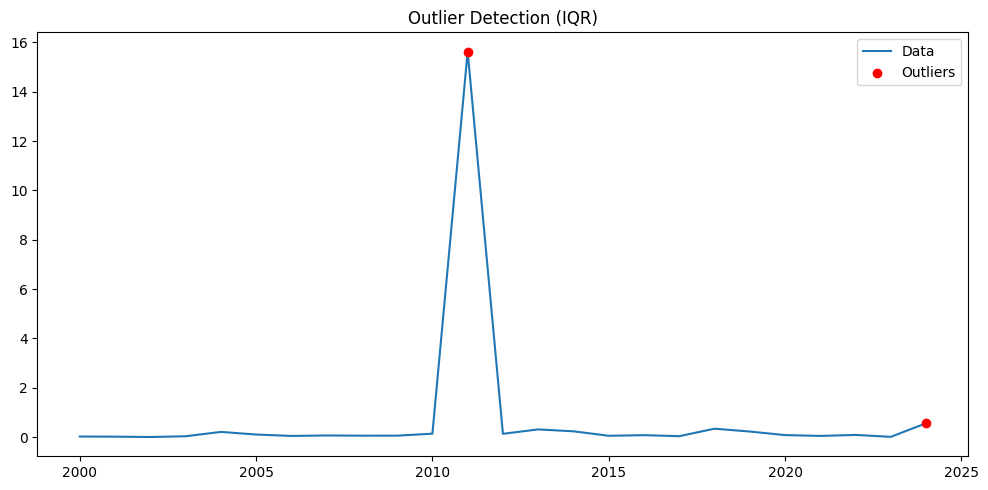

Running grid search...

Best model based on MAE:
changepoint_prior_scale       0.05
n_changepoints                  15
changepoint_range              0.9
holidays_prior_scale          10.0
Model                      Prophet
MAE                         1.6092
RMSE                        4.7236
MASE                        1.1617
Coverage_90%                   0.5
n_forecasts                     10
Name: 0, dtype: object

Best Prophet parameters:
{'changepoint_prior_scale': np.float64(0.05), 'n_changepoints': np.int64(15), 'changepoint_range': np.float64(0.9), 'holidays_prior_scale': np.float64(10.0)}
========== PIPELINE FINISHED ==========


In [174]:
japan_model = ProphetModel(japan)
results = japan_model.run_pipeline_prophet(
    param_grid=grid
)

In [175]:
results["cv_results"]

,changepoint_prior_scale,n_changepoints,changepoint_range,holidays_prior_scale,Model,MAE,RMSE,MASE,Coverage_90%,n_forecasts
0,0.05,15,0.9,10.0,Prophet,1.6092,4.7236,1.1617,0.5,10
1,0.05,15,0.9,15.0,Prophet,1.6100,4.7238,1.1623,0.5,10
2,0.10,15,0.8,15.0,Prophet,1.6109,4.7003,1.1629,0.5,10
3,0.10,20,0.8,10.0,Prophet,1.6109,4.7007,1.1629,0.5,10
4,0.10,25,0.8,10.0,Prophet,1.6109,4.7007,1.1629,0.5,10
5,0.10,25,0.8,15.0,Prophet,1.6109,4.7010,1.1630,0.5,10
6,0.10,20,0.8,15.0,Prophet,1.6109,4.7010,1.1630,0.5,10
7,0.10,15,0.8,10.0,Prophet,1.6115,4.7002,1.1634,0.5,10
8,0.50,20,0.8,15.0,Prophet,1.6121,4.6999,1.1638,0.5,10
9,0.50,20,0.8,10.0,Prophet,1.6121,4.6999,1.1638,0.5,10


In [176]:
results["best_params"]

{'changepoint_prior_scale': np.float64(0.05),
 'n_changepoints': np.int64(15),
 'changepoint_range': np.float64(0.9),
 'holidays_prior_scale': np.float64(10.0)}

In [177]:
results["best_model_summary"]

,changepoint_prior_scale,n_changepoints,changepoint_range,holidays_prior_scale,Model,MAE,RMSE,MASE,Coverage_90%,n_forecasts
0,0.05,15,0.9,10.0,Prophet,1.6092,4.7236,1.1617,0.5,10


## 4.3. France

In [178]:
france = prepare_level_data(df, level='country', filter='France')
france

,Year,Total_Deaths,Population,Mortality_Rate
0,2000,9.0,60918661.0,0.014774
1,2001,17.0,61364377.0,0.027703
2,2002,30.0,61812142.0,0.048534
3,2003,19511.0,62249855.0,31.343045
4,2004,11.0,62707588.0,0.017542
5,2005,13.0,63180854.0,0.020576
6,2006,1393.0,63622342.0,2.189482
7,2007,5.0,64016890.0,0.007810
8,2008,3.0,64375116.0,0.004660
9,2009,18.0,64706436.0,0.027818


========== PROPHET PIPELINE START ==========
Detected outlier years: [2003, 2022]


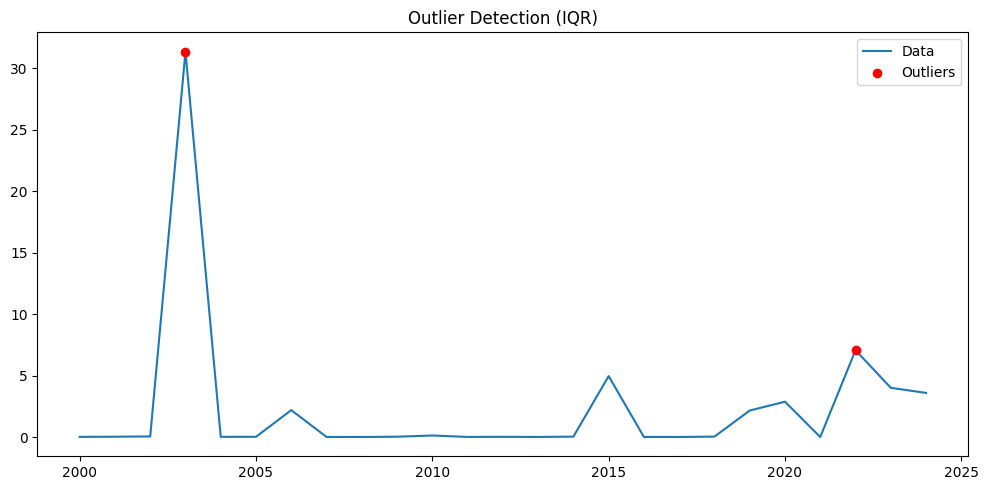

Running grid search...

Best model based on MAE:
changepoint_prior_scale       0.05
n_changepoints                  20
changepoint_range              0.9
holidays_prior_scale          15.0
Model                      Prophet
MAE                         4.8318
RMSE                        8.5792
MASE                        1.2411
Coverage_90%                   0.8
n_forecasts                     10
Name: 0, dtype: object

Best Prophet parameters:
{'changepoint_prior_scale': np.float64(0.05), 'n_changepoints': np.int64(20), 'changepoint_range': np.float64(0.9), 'holidays_prior_scale': np.float64(15.0)}
========== PIPELINE FINISHED ==========


In [179]:
france_model = ProphetModel(france)
results = france_model.run_pipeline_prophet(
    param_grid=grid
)

In [180]:
results["cv_results"]

,changepoint_prior_scale,n_changepoints,changepoint_range,holidays_prior_scale,Model,MAE,RMSE,MASE,Coverage_90%,n_forecasts
0,0.05,20,0.9,15.0,Prophet,4.8318,8.5792,1.2411,0.8,10
1,0.05,25,0.9,15.0,Prophet,4.8318,8.5792,1.2411,0.8,10
2,0.05,20,0.8,10.0,Prophet,4.8356,8.5797,1.2420,0.8,10
3,0.05,15,0.8,10.0,Prophet,4.8356,8.5797,1.2420,0.8,10
4,0.05,25,0.8,10.0,Prophet,4.8356,8.5797,1.2420,0.8,10
5,0.05,15,0.9,15.0,Prophet,4.8356,8.5807,1.2420,0.8,10
6,0.05,20,0.9,10.0,Prophet,4.8361,8.5798,1.2422,0.8,10
7,0.05,25,0.9,10.0,Prophet,4.8361,8.5798,1.2422,0.8,10
8,0.05,15,0.9,10.0,Prophet,4.8368,8.5799,1.2424,0.8,10
9,0.05,15,0.8,15.0,Prophet,4.8369,8.5809,1.2424,0.8,10


In [181]:
results["best_params"]

{'changepoint_prior_scale': np.float64(0.05),
 'n_changepoints': np.int64(20),
 'changepoint_range': np.float64(0.9),
 'holidays_prior_scale': np.float64(15.0)}

In [182]:
results["best_model_summary"]

,changepoint_prior_scale,n_changepoints,changepoint_range,holidays_prior_scale,Model,MAE,RMSE,MASE,Coverage_90%,n_forecasts
0,0.05,20,0.9,15.0,Prophet,4.8318,8.5792,1.2411,0.8,10


## 4.4. Italy

In [183]:
italy = prepare_level_data(df, level='country', filter='Italy')
italy

,Year,Total_Deaths,Population,Mortality_Rate
0,2000,44.0,56942108.0,0.077271
1,2001,0.0,56976981.0,0.000000
2,2002,37.0,57089824.0,0.064810
3,2003,20092.0,57399184.0,35.003982
4,2004,2.0,57828179.0,0.003459
5,2005,9.0,58166682.0,0.015473
6,2006,5.0,58399861.0,0.008562
7,2007,17.0,58756247.0,0.028933
8,2008,9.0,59211181.0,0.015200
9,2009,340.0,59555454.0,0.570896


========== PROPHET PIPELINE START ==========
Detected outlier years: [2003, 2009, 2016, 2022, 2023, 2024]


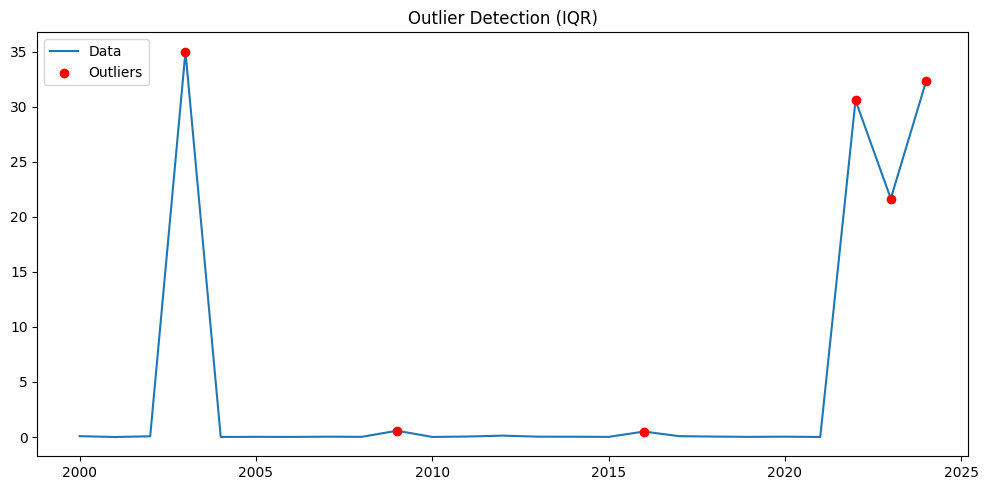

Running grid search...

Best model based on MAE:
changepoint_prior_scale        0.5
n_changepoints                  20
changepoint_range              0.9
holidays_prior_scale          10.0
Model                      Prophet
MAE                         7.0355
RMSE                        9.4005
MASE                        1.3766
Coverage_90%                   0.7
n_forecasts                     10
Name: 0, dtype: object

Best Prophet parameters:
{'changepoint_prior_scale': np.float64(0.5), 'n_changepoints': np.int64(20), 'changepoint_range': np.float64(0.9), 'holidays_prior_scale': np.float64(10.0)}
========== PIPELINE FINISHED ==========


In [184]:
italy_model = ProphetModel(italy)
results = italy_model.run_pipeline_prophet(
    param_grid=grid
)

In [185]:
results["cv_results"]

,changepoint_prior_scale,n_changepoints,changepoint_range,holidays_prior_scale,Model,MAE,RMSE,MASE,Coverage_90%,n_forecasts
0,0.50,20,0.9,10.0,Prophet,7.0355,9.4005,1.3766,0.7,10
1,0.50,25,0.9,10.0,Prophet,7.0355,9.4005,1.3766,0.7,10
2,0.50,15,0.9,15.0,Prophet,7.0450,9.4507,1.3784,0.7,10
3,0.50,20,0.8,10.0,Prophet,7.0563,9.4078,1.3806,0.8,10
4,0.50,25,0.8,10.0,Prophet,7.0563,9.4078,1.3806,0.8,10
5,0.50,15,0.9,10.0,Prophet,7.0568,9.4442,1.3807,0.7,10
6,0.50,20,0.8,15.0,Prophet,7.0583,9.4089,1.3810,0.7,10
7,0.50,25,0.8,15.0,Prophet,7.0583,9.4089,1.3810,0.7,10
8,0.50,20,0.9,15.0,Prophet,7.0631,9.4101,1.3820,0.7,10
9,0.50,25,0.9,15.0,Prophet,7.0631,9.4101,1.3820,0.7,10


In [186]:
results["best_params"]

{'changepoint_prior_scale': np.float64(0.5),
 'n_changepoints': np.int64(20),
 'changepoint_range': np.float64(0.9),
 'holidays_prior_scale': np.float64(10.0)}

In [187]:
results["best_model_summary"]

,changepoint_prior_scale,n_changepoints,changepoint_range,holidays_prior_scale,Model,MAE,RMSE,MASE,Coverage_90%,n_forecasts
0,0.5,20,0.9,10.0,Prophet,7.0355,9.4005,1.3766,0.7,10


## 4.5. Brazil

In [188]:
brazil = prepare_level_data(df, level='country', filter='Brazil')
brazil

,Year,Total_Deaths,Population,Mortality_Rate
0,2000,108.0,174018282.0,0.062062
1,2001,98.0,176301203.0,0.055587
2,2002,161.0,178503484.0,0.090194
3,2003,255.0,180622688.0,0.141178
4,2004,39.0,182675143.0,0.021349
5,2005,49.0,184688101.0,0.026531
6,2006,20.0,186653106.0,0.010715
7,2007,70.0,188552320.0,0.037125
8,2008,326.0,190367302.0,0.171248
9,2009,191.0,192079951.0,0.099438


========== PROPHET PIPELINE START ==========
Detected outlier years: [2011]


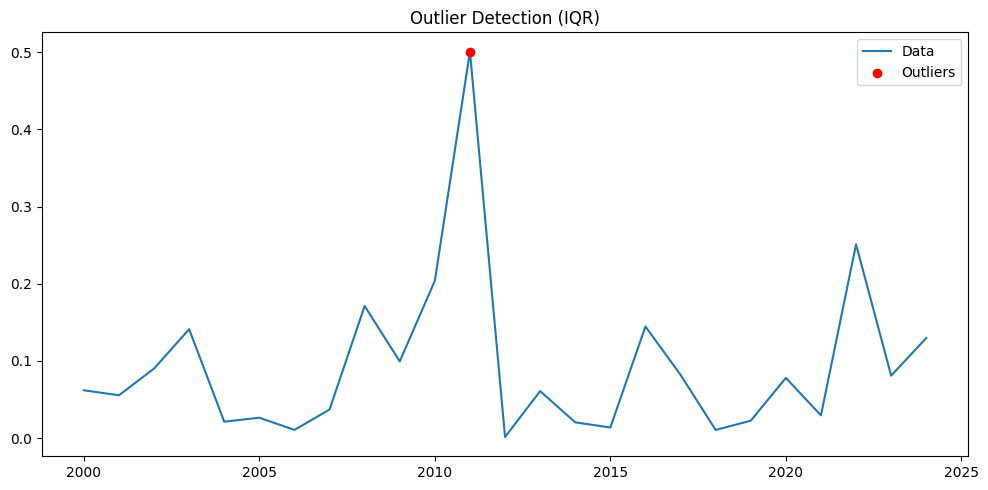

Running grid search...

Best model based on MAE:
changepoint_prior_scale       0.05
n_changepoints                  20
changepoint_range              0.9
holidays_prior_scale          15.0
Model                      Prophet
MAE                         0.0558
RMSE                        0.0779
MASE                         0.584
Coverage_90%                   0.9
n_forecasts                     10
Name: 0, dtype: object

Best Prophet parameters:
{'changepoint_prior_scale': np.float64(0.05), 'n_changepoints': np.int64(20), 'changepoint_range': np.float64(0.9), 'holidays_prior_scale': np.float64(15.0)}
========== PIPELINE FINISHED ==========


In [189]:
brazil_model = ProphetModel(brazil)
results = brazil_model.run_pipeline_prophet(
    param_grid=grid
)

In [190]:
results["cv_results"]

,changepoint_prior_scale,n_changepoints,changepoint_range,holidays_prior_scale,Model,MAE,RMSE,MASE,Coverage_90%,n_forecasts
0,0.05,20,0.9,15.0,Prophet,0.0558,0.0779,0.5840,0.9,10
1,0.05,25,0.9,15.0,Prophet,0.0558,0.0779,0.5840,0.9,10
2,0.05,20,0.8,15.0,Prophet,0.0559,0.0779,0.5845,0.8,10
3,0.05,15,0.8,15.0,Prophet,0.0559,0.0779,0.5853,0.9,10
4,0.05,25,0.8,15.0,Prophet,0.0559,0.0779,0.5845,0.9,10
5,0.10,15,0.9,15.0,Prophet,0.0559,0.0780,0.5847,0.9,10
6,0.10,25,0.9,15.0,Prophet,0.0559,0.0780,0.5852,0.9,10
7,0.10,20,0.9,15.0,Prophet,0.0559,0.0780,0.5852,0.9,10
8,0.20,20,0.9,10.0,Prophet,0.0559,0.0779,0.5854,0.8,10
9,0.20,25,0.9,10.0,Prophet,0.0559,0.0779,0.5854,0.9,10


In [191]:
results["best_params"]

{'changepoint_prior_scale': np.float64(0.05),
 'n_changepoints': np.int64(20),
 'changepoint_range': np.float64(0.9),
 'holidays_prior_scale': np.float64(15.0)}

In [192]:
results["best_model_summary"]

,changepoint_prior_scale,n_changepoints,changepoint_range,holidays_prior_scale,Model,MAE,RMSE,MASE,Coverage_90%,n_forecasts
0,0.05,20,0.9,15.0,Prophet,0.0558,0.0779,0.584,0.9,10


## 4.6. Mexico

In [193]:
mexico = prepare_level_data(df, level='country', filter='Mexico')
mexico

,Year,Total_Deaths,Population,Mortality_Rate
0,2000,236.0,98625552.0,0.239289
1,2001,26.0,100099099.0,0.025974
2,2002,103.0,101548624.0,0.101429
3,2003,70.0,102978515.0,0.067975
4,2004,52.0,104394131.0,0.049811
5,2005,88.0,105811504.0,0.083167
6,2006,41.0,107253666.0,0.038227
7,2007,58.0,108774360.0,0.053321
8,2008,36.0,110374288.0,0.032616
9,2009,32.0,111999721.0,0.028571


========== PROPHET PIPELINE START ==========
Detected outlier years: [2000, 2017]


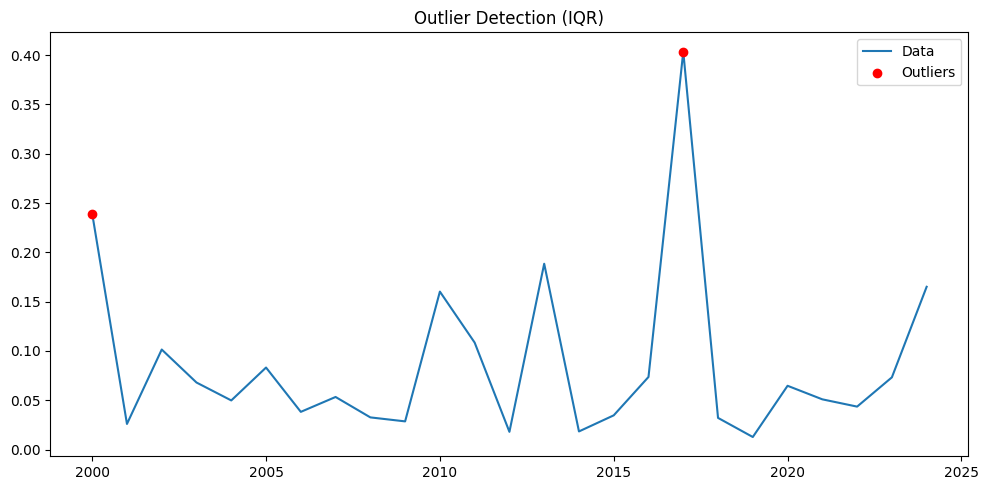

Running grid search...

Best model based on MAE:
changepoint_prior_scale        0.5
n_changepoints                  25
changepoint_range              0.9
holidays_prior_scale          15.0
Model                      Prophet
MAE                         0.0507
RMSE                         0.069
MASE                        0.5951
Coverage_90%                   0.8
n_forecasts                     10
Name: 0, dtype: object

Best Prophet parameters:
{'changepoint_prior_scale': np.float64(0.5), 'n_changepoints': np.int64(25), 'changepoint_range': np.float64(0.9), 'holidays_prior_scale': np.float64(15.0)}
========== PIPELINE FINISHED ==========


In [194]:
mexico_model = ProphetModel(mexico)
results = mexico_model.run_pipeline_prophet(
    param_grid=grid
)

In [195]:
results["cv_results"]

,changepoint_prior_scale,n_changepoints,changepoint_range,holidays_prior_scale,Model,MAE,RMSE,MASE,Coverage_90%,n_forecasts
0,0.50,25,0.9,15.0,Prophet,0.0507,0.0690,0.5951,0.8,10
1,0.50,25,0.8,15.0,Prophet,0.0507,0.0691,0.5951,0.8,10
2,0.50,15,0.8,10.0,Prophet,0.0507,0.0690,0.5953,0.8,10
3,0.50,15,0.8,15.0,Prophet,0.0507,0.0690,0.5950,0.8,10
4,0.50,20,0.9,15.0,Prophet,0.0507,0.0690,0.5951,0.8,10
5,0.50,20,0.8,15.0,Prophet,0.0507,0.0691,0.5951,0.8,10
6,0.50,20,0.8,10.0,Prophet,0.0508,0.0690,0.5963,0.8,10
7,0.50,20,0.9,10.0,Prophet,0.0508,0.0691,0.5966,0.8,10
8,0.50,25,0.8,10.0,Prophet,0.0508,0.0690,0.5963,0.8,10
9,0.50,25,0.9,10.0,Prophet,0.0508,0.0691,0.5966,0.8,10


In [196]:
results["best_params"]

{'changepoint_prior_scale': np.float64(0.5),
 'n_changepoints': np.int64(25),
 'changepoint_range': np.float64(0.9),
 'holidays_prior_scale': np.float64(15.0)}

In [197]:
results["best_model_summary"]

,changepoint_prior_scale,n_changepoints,changepoint_range,holidays_prior_scale,Model,MAE,RMSE,MASE,Coverage_90%,n_forecasts
0,0.5,25,0.9,15.0,Prophet,0.0507,0.069,0.5951,0.8,10


## 4.7. Sudan

In [198]:
sudan = prepare_level_data(df, level='country', filter='Sudan')
sudan

,Year,Total_Deaths,Population,Mortality_Rate
0,2000,186.0,27816745.0,0.668662
1,2001,3.0,28516770.0,0.010520
2,2002,82.0,29228727.0,0.280546
3,2003,47.0,29896035.0,0.157211
4,2004,98.0,30556637.0,0.320716
5,2005,655.0,31262444.0,2.095166
6,2006,1169.0,31992435.0,3.653989
7,2007,734.0,32764135.0,2.240254
8,2008,15.0,33623980.0,0.044611
9,2009,20.0,34569113.0,0.057855


========== PROPHET PIPELINE START ==========
Detected outlier years: [2005, 2006, 2007, 2017, 2024]


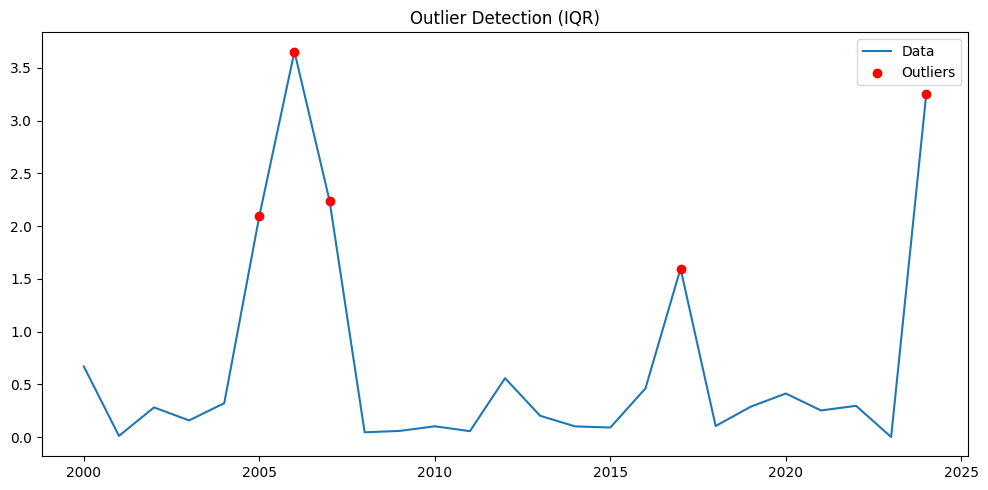

Running grid search...

Best model based on MAE:
changepoint_prior_scale       0.05
n_changepoints                  20
changepoint_range              0.9
holidays_prior_scale          15.0
Model                      Prophet
MAE                         0.3593
RMSE                        0.4942
MASE                        0.5293
Coverage_90%                   0.8
n_forecasts                     10
Name: 0, dtype: object

Best Prophet parameters:
{'changepoint_prior_scale': np.float64(0.05), 'n_changepoints': np.int64(20), 'changepoint_range': np.float64(0.9), 'holidays_prior_scale': np.float64(15.0)}
========== PIPELINE FINISHED ==========


In [199]:
sudan_model = ProphetModel(sudan)
results = sudan_model.run_pipeline_prophet(
    param_grid=grid
)

In [200]:
results["cv_results"]

,changepoint_prior_scale,n_changepoints,changepoint_range,holidays_prior_scale,Model,MAE,RMSE,MASE,Coverage_90%,n_forecasts
0,0.05,20,0.9,15.0,Prophet,0.3593,0.4942,0.5293,0.8,10
1,0.05,25,0.9,15.0,Prophet,0.3593,0.4942,0.5293,0.8,10
2,0.05,25,0.8,15.0,Prophet,0.3602,0.4945,0.5307,0.8,10
3,0.05,20,0.8,15.0,Prophet,0.3602,0.4945,0.5307,0.8,10
4,0.10,15,0.9,10.0,Prophet,0.3602,0.4952,0.5306,0.8,10
5,0.20,20,0.9,10.0,Prophet,0.3602,0.4948,0.5307,0.8,10
6,0.20,25,0.9,10.0,Prophet,0.3602,0.4948,0.5307,0.8,10
7,0.20,15,0.8,10.0,Prophet,0.3603,0.4948,0.5308,0.8,10
8,0.05,15,0.8,15.0,Prophet,0.3603,0.4958,0.5308,0.8,10
9,0.10,25,0.9,15.0,Prophet,0.3604,0.4947,0.5310,0.8,10


In [201]:
results["best_params"]


{'changepoint_prior_scale': np.float64(0.05),
 'n_changepoints': np.int64(20),
 'changepoint_range': np.float64(0.9),
 'holidays_prior_scale': np.float64(15.0)}

In [202]:
results["best_model_summary"]

,changepoint_prior_scale,n_changepoints,changepoint_range,holidays_prior_scale,Model,MAE,RMSE,MASE,Coverage_90%,n_forecasts
0,0.05,20,0.9,15.0,Prophet,0.3593,0.4942,0.5293,0.8,10


## 4.8. Türkiye

In [203]:
turky = prepare_level_data(df, level='country', filter='Türkiye')
turky

,Year,Total_Deaths,Population,Mortality_Rate
0,2000,16.0,65425961.0,0.024455
1,2001,50.0,66245128.0,0.075477
2,2002,86.0,67048795.0,0.128265
3,2003,177.0,67831730.0,0.260940
4,2004,79.0,68592617.0,0.115173
5,2005,43.0,69329557.0,0.062023
6,2006,79.0,70045349.0,0.112784
7,2007,19.0,70158112.0,0.027082
8,2008,2.0,71051678.0,0.002815
9,2009,58.0,72039206.0,0.080512


========== PROPHET PIPELINE START ==========
Detected outlier years: [2011, 2020, 2023]


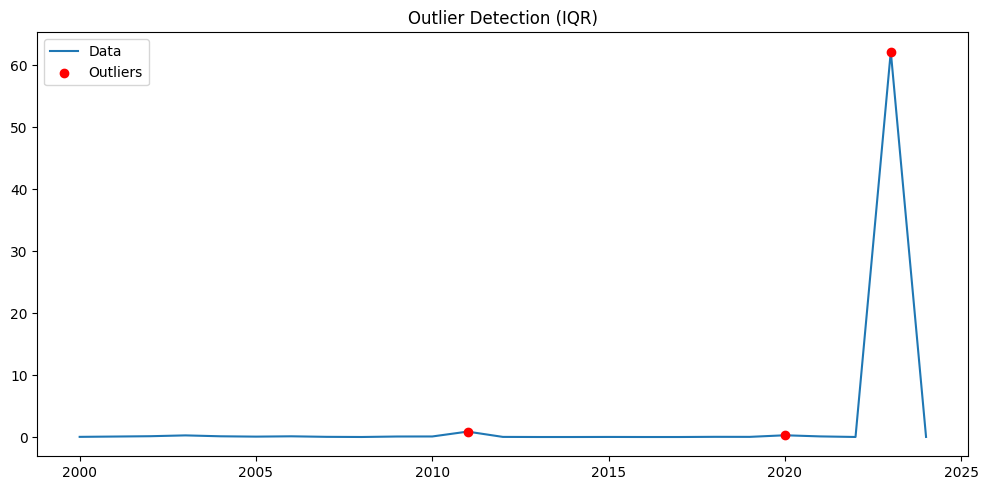

Running grid search...

Best model based on MAE:
changepoint_prior_scale       0.05
n_changepoints                  15
changepoint_range              0.8
holidays_prior_scale          10.0
Model                      Prophet
MAE                         6.6549
RMSE                       19.5419
MASE                         1.255
Coverage_90%                   0.8
n_forecasts                     10
Name: 0, dtype: object

Best Prophet parameters:
{'changepoint_prior_scale': np.float64(0.05), 'n_changepoints': np.int64(15), 'changepoint_range': np.float64(0.8), 'holidays_prior_scale': np.float64(10.0)}
========== PIPELINE FINISHED ==========


In [204]:
turky_model = ProphetModel(turky)
results = turky_model.run_pipeline_prophet(
    param_grid=grid
)

In [205]:
results["cv_results"]

,changepoint_prior_scale,n_changepoints,changepoint_range,holidays_prior_scale,Model,MAE,RMSE,MASE,Coverage_90%,n_forecasts
0,0.05,15,0.8,10.0,Prophet,6.6549,19.5419,1.2550,0.8,10
1,0.10,20,0.9,10.0,Prophet,6.6580,19.5425,1.2556,0.7,10
2,0.10,25,0.9,10.0,Prophet,6.6580,19.5425,1.2556,0.8,10
3,0.10,25,0.8,10.0,Prophet,6.6581,19.5425,1.2556,0.8,10
4,0.10,20,0.8,10.0,Prophet,6.6581,19.5425,1.2556,0.7,10
5,0.10,15,0.8,10.0,Prophet,6.6582,19.5426,1.2556,0.7,10
6,0.10,20,0.9,15.0,Prophet,6.6582,19.5425,1.2556,0.8,10
7,0.10,25,0.9,15.0,Prophet,6.6582,19.5425,1.2556,0.8,10
8,0.10,25,0.8,15.0,Prophet,6.6584,19.5425,1.2556,0.8,10
9,0.10,20,0.8,15.0,Prophet,6.6584,19.5425,1.2556,0.8,10


In [206]:
results["best_params"]

{'changepoint_prior_scale': np.float64(0.05),
 'n_changepoints': np.int64(15),
 'changepoint_range': np.float64(0.8),
 'holidays_prior_scale': np.float64(10.0)}

In [207]:
results["best_model_summary"]

,changepoint_prior_scale,n_changepoints,changepoint_range,holidays_prior_scale,Model,MAE,RMSE,MASE,Coverage_90%,n_forecasts
0,0.05,15,0.8,10.0,Prophet,6.6549,19.5419,1.255,0.8,10


## 4.9. Canada

In [208]:
canada = prepare_level_data(df, level='country', filter='Canada')
canada

,Year,Total_Deaths,Population,Mortality_Rate
0,2000,11.0,30685730.0,0.035847
1,2001,12.0,31020855.0,0.038684
2,2002,2.0,31359199.0,0.006378
3,2003,7.0,31642461.0,0.022122
4,2004,0.0,31938807.0,0.000000
5,2005,4.0,32242732.0,0.012406
6,2006,1.0,32571193.0,0.003070
7,2007,6.0,32888886.0,0.018243
8,2008,0.0,33247298.0,0.000000
9,2009,2.0,33630069.0,0.005947


========== PROPHET PIPELINE START ==========
Detected outlier years: [2018, 2021]


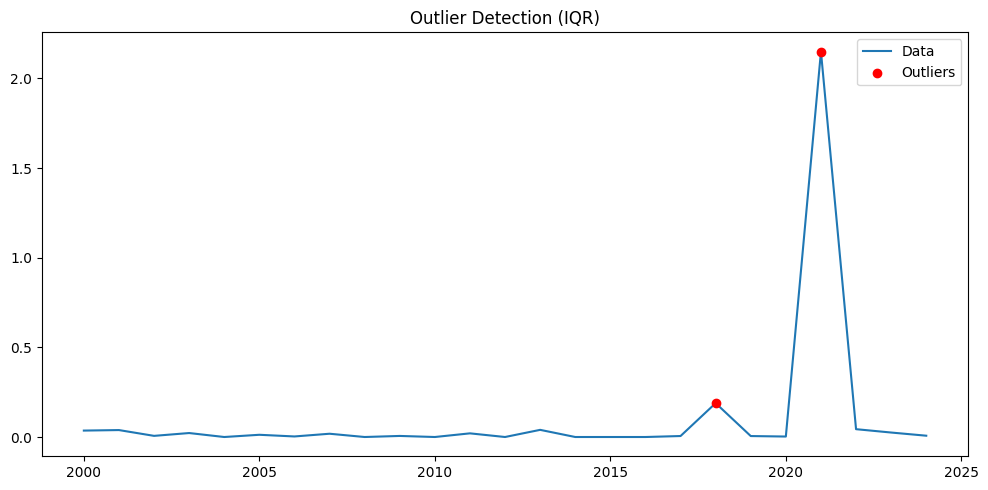

Running grid search...

Best model based on MAE:
changepoint_prior_scale        0.2
n_changepoints                  20
changepoint_range              0.8
holidays_prior_scale          15.0
Model                      Prophet
MAE                          0.224
RMSE                        0.6237
MASE                        1.0917
Coverage_90%                   0.8
n_forecasts                     10
Name: 0, dtype: object

Best Prophet parameters:
{'changepoint_prior_scale': np.float64(0.2), 'n_changepoints': np.int64(20), 'changepoint_range': np.float64(0.8), 'holidays_prior_scale': np.float64(15.0)}
========== PIPELINE FINISHED ==========


In [209]:
canada_model = ProphetModel(canada)
results = canada_model.run_pipeline_prophet(
    param_grid=grid
)

In [210]:
results["cv_results"]


,changepoint_prior_scale,n_changepoints,changepoint_range,holidays_prior_scale,Model,MAE,RMSE,MASE,Coverage_90%,n_forecasts
0,0.20,20,0.8,15.0,Prophet,0.2240,0.6237,1.0917,0.8,10
1,0.20,15,0.8,10.0,Prophet,0.2240,0.6237,1.0918,0.8,10
2,0.20,15,0.8,15.0,Prophet,0.2240,0.6237,1.0918,0.8,10
3,0.20,25,0.8,15.0,Prophet,0.2240,0.6237,1.0917,0.8,10
4,0.20,20,0.9,15.0,Prophet,0.2241,0.6237,1.0921,0.8,10
5,0.20,15,0.9,15.0,Prophet,0.2241,0.6236,1.0922,0.8,10
6,0.20,20,0.9,10.0,Prophet,0.2241,0.6237,1.0919,0.8,10
7,0.20,15,0.9,10.0,Prophet,0.2241,0.6237,1.0921,0.8,10
8,0.20,25,0.9,10.0,Prophet,0.2241,0.6237,1.0919,0.8,10
9,0.20,25,0.9,15.0,Prophet,0.2241,0.6237,1.0921,0.8,10


In [211]:
results["best_params"]


{'changepoint_prior_scale': np.float64(0.2),
 'n_changepoints': np.int64(20),
 'changepoint_range': np.float64(0.8),
 'holidays_prior_scale': np.float64(15.0)}

In [212]:
results["best_model_summary"]


,changepoint_prior_scale,n_changepoints,changepoint_range,holidays_prior_scale,Model,MAE,RMSE,MASE,Coverage_90%,n_forecasts
0,0.2,20,0.8,15.0,Prophet,0.224,0.6237,1.0917,0.8,10


## 4.10. United States of America

In [213]:
america = prepare_level_data(df, level='country', filter='United States of America')
america

,Year,Total_Deaths,Population,Mortality_Rate
0,2000,162.0,282162411.0,0.057414
1,2001,153.0,284968955.0,0.053690
2,2002,444.0,287625193.0,0.154368
3,2003,231.0,290107933.0,0.079626
4,2004,219.0,292805298.0,0.074794
5,2005,1973.0,295516599.0,0.667644
6,2006,338.0,298379912.0,0.113278
7,2007,352.0,301231207.0,0.116854
8,2008,303.0,304093966.0,0.099640
9,2009,145.0,306771529.0,0.047266


========== PROPHET PIPELINE START ==========
Detected outlier years: [2005, 2024]


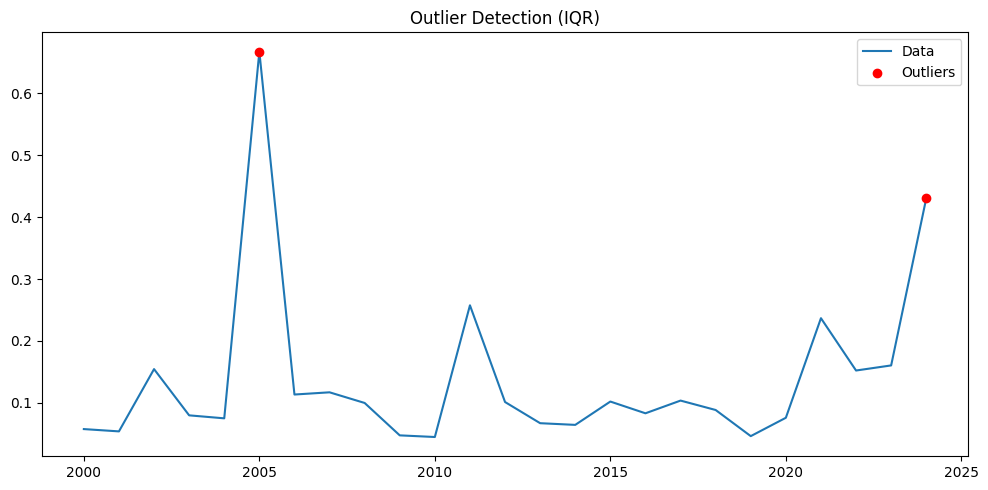

Running grid search...

Best model based on MAE:
changepoint_prior_scale        0.2
n_changepoints                  15
changepoint_range              0.9
holidays_prior_scale          10.0
Model                      Prophet
MAE                         0.0614
RMSE                        0.1044
MASE                        0.5888
Coverage_90%                   0.8
n_forecasts                     10
Name: 0, dtype: object

Best Prophet parameters:
{'changepoint_prior_scale': np.float64(0.2), 'n_changepoints': np.int64(15), 'changepoint_range': np.float64(0.9), 'holidays_prior_scale': np.float64(10.0)}
========== PIPELINE FINISHED ==========


In [214]:
america_model = ProphetModel(america)
results = america_model.run_pipeline_prophet(
    param_grid=grid
)

In [215]:
results["cv_results"]


,changepoint_prior_scale,n_changepoints,changepoint_range,holidays_prior_scale,Model,MAE,RMSE,MASE,Coverage_90%,n_forecasts
0,0.20,15,0.9,10.0,Prophet,0.0614,0.1044,0.5888,0.8,10
1,0.05,20,0.8,15.0,Prophet,0.0616,0.1035,0.5914,0.8,10
2,0.05,25,0.8,15.0,Prophet,0.0616,0.1035,0.5914,0.8,10
3,0.05,15,0.9,15.0,Prophet,0.0617,0.1035,0.5923,0.8,10
4,0.05,20,0.8,10.0,Prophet,0.0617,0.1035,0.5923,0.8,10
5,0.10,15,0.8,15.0,Prophet,0.0617,0.1035,0.5923,0.8,10
6,0.05,25,0.8,10.0,Prophet,0.0617,0.1035,0.5923,0.8,10
7,0.05,15,0.8,15.0,Prophet,0.0617,0.1035,0.5916,0.8,10
8,0.10,25,0.9,10.0,Prophet,0.0617,0.1034,0.5919,0.8,10
9,0.20,15,0.8,15.0,Prophet,0.0617,0.1050,0.5922,0.8,10


In [216]:
results["best_params"]


{'changepoint_prior_scale': np.float64(0.2),
 'n_changepoints': np.int64(15),
 'changepoint_range': np.float64(0.9),
 'holidays_prior_scale': np.float64(10.0)}

In [217]:
results["best_model_summary"]


,changepoint_prior_scale,n_changepoints,changepoint_range,holidays_prior_scale,Model,MAE,RMSE,MASE,Coverage_90%,n_forecasts
0,0.2,15,0.9,10.0,Prophet,0.0614,0.1044,0.5888,0.8,10


## 4.11. India

In [218]:
india = prepare_level_data(df, level='country', filter='India')
india

,Year,Total_Deaths,Population,Mortality_Rate
0,2000,2810.0,1.057923e+09,0.265615
1,2001,21045.0,1.077899e+09,1.952410
2,2002,2991.0,1.097600e+09,0.272504
3,2003,2251.0,1.116803e+09,0.201557
4,2004,17737.0,1.135992e+09,1.561367
5,2005,5041.0,1.154676e+09,0.436573
6,2006,1431.0,1.172879e+09,0.122007
7,2007,2236.0,1.190676e+09,0.187792
8,2008,1808.0,1.207931e+09,0.149677
9,2009,2204.0,1.225525e+09,0.179841


========== PROPHET PIPELINE START ==========
Detected outlier years: [2001, 2004, 2013]


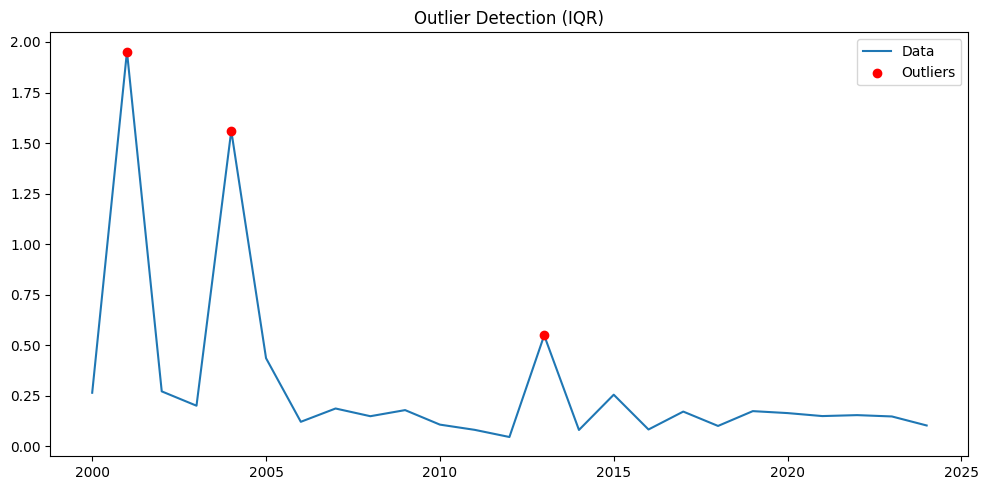

Running grid search...

Best model based on MAE:
changepoint_prior_scale        0.5
n_changepoints                  15
changepoint_range              0.9
holidays_prior_scale          15.0
Model                      Prophet
MAE                          0.101
RMSE                        0.1542
MASE                        0.2982
Coverage_90%                   0.9
n_forecasts                     10
Name: 0, dtype: object

Best Prophet parameters:
{'changepoint_prior_scale': np.float64(0.5), 'n_changepoints': np.int64(15), 'changepoint_range': np.float64(0.9), 'holidays_prior_scale': np.float64(15.0)}
========== PIPELINE FINISHED ==========


In [219]:
india_model = ProphetModel(india)
results = india_model.run_pipeline_prophet(
    param_grid=grid
)

In [220]:
results["cv_results"]


,changepoint_prior_scale,n_changepoints,changepoint_range,holidays_prior_scale,Model,MAE,RMSE,MASE,Coverage_90%,n_forecasts
0,0.50,15,0.9,15.0,Prophet,0.1010,0.1542,0.2982,0.9,10
1,0.50,20,0.9,15.0,Prophet,0.1100,0.1565,0.3247,0.9,10
2,0.50,25,0.9,15.0,Prophet,0.1100,0.1565,0.3247,0.9,10
3,0.50,15,0.9,10.0,Prophet,0.1108,0.1633,0.3269,0.9,10
4,0.50,25,0.9,10.0,Prophet,0.1195,0.1654,0.3525,0.9,10
5,0.50,20,0.9,10.0,Prophet,0.1195,0.1654,0.3525,0.9,10
6,0.30,15,0.8,10.0,Prophet,0.1239,0.1816,0.3656,0.9,10
7,0.50,15,0.8,10.0,Prophet,0.1260,0.1717,0.3717,0.9,10
8,0.50,15,0.8,15.0,Prophet,0.1261,0.1716,0.3720,0.9,10
9,0.30,20,0.8,10.0,Prophet,0.1265,0.1820,0.3733,0.9,10


In [221]:
results["best_params"]


{'changepoint_prior_scale': np.float64(0.5),
 'n_changepoints': np.int64(15),
 'changepoint_range': np.float64(0.9),
 'holidays_prior_scale': np.float64(15.0)}

In [222]:
results["best_model_summary"]


,changepoint_prior_scale,n_changepoints,changepoint_range,holidays_prior_scale,Model,MAE,RMSE,MASE,Coverage_90%,n_forecasts
0,0.5,15,0.9,15.0,Prophet,0.101,0.1542,0.2982,0.9,10


## 4.12. Pakistan

In [223]:
pakistan = prepare_level_data(df, level='country', filter='Pakistan')
pakistan

,Year,Total_Deaths,Population,Mortality_Rate
0,2000,133.0,154879127.0,0.085873
1,2001,257.0,159270907.0,0.161360
2,2002,213.0,163222549.0,0.130497
3,2003,529.0,167110248.0,0.316557
4,2004,31.0,171286000.0,0.018098
5,2005,74204.0,175453212.0,42.292757
6,2006,513.0,179682690.0,0.285503
7,2007,911.0,184493231.0,0.493785
8,2008,249.0,189499113.0,0.131399
9,2009,102.0,194376534.0,0.052475


========== PROPHET PIPELINE START ==========
Detected outlier years: [2005, 2010, 2015, 2022]


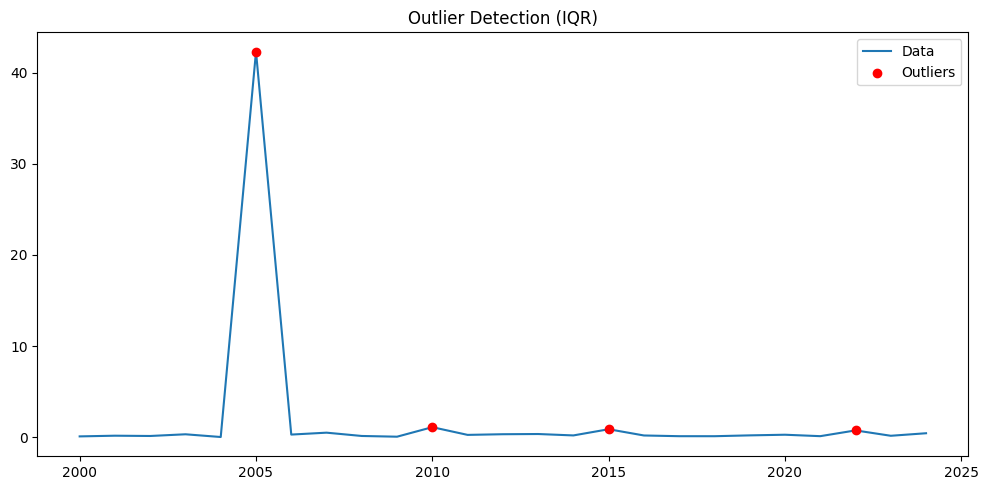

Running grid search...

Best model based on MAE:
changepoint_prior_scale       0.05
n_changepoints                  20
changepoint_range              0.9
holidays_prior_scale          15.0
Model                      Prophet
MAE                         6.1842
RMSE                        7.6884
MASE                        1.6324
Coverage_90%                   0.9
n_forecasts                     10
Name: 0, dtype: object

Best Prophet parameters:
{'changepoint_prior_scale': np.float64(0.05), 'n_changepoints': np.int64(20), 'changepoint_range': np.float64(0.9), 'holidays_prior_scale': np.float64(15.0)}
========== PIPELINE FINISHED ==========


In [224]:
pakistan_model = ProphetModel(pakistan)
results = pakistan_model.run_pipeline_prophet(
    param_grid=grid
)

In [225]:
results["cv_results"]


,changepoint_prior_scale,n_changepoints,changepoint_range,holidays_prior_scale,Model,MAE,RMSE,MASE,Coverage_90%,n_forecasts
0,0.05,20,0.9,15.0,Prophet,6.1842,7.6884,1.6324,0.9,10
1,0.05,25,0.9,15.0,Prophet,6.1842,7.6884,1.6324,0.8,10
2,0.10,25,0.8,15.0,Prophet,6.1882,7.6913,1.6334,0.8,10
3,0.10,20,0.8,15.0,Prophet,6.1882,7.6913,1.6334,0.9,10
4,0.05,15,0.8,15.0,Prophet,6.1941,7.6996,1.6350,0.9,10
5,0.10,25,0.9,15.0,Prophet,6.1976,7.7033,1.6359,0.9,10
6,0.05,25,0.8,15.0,Prophet,6.1976,7.7011,1.6359,0.9,10
7,0.05,20,0.8,15.0,Prophet,6.1976,7.7011,1.6359,0.9,10
8,0.10,20,0.9,15.0,Prophet,6.1976,7.7033,1.6359,0.9,10
9,0.05,15,0.9,15.0,Prophet,6.1997,7.7012,1.6365,0.8,10


In [226]:
results["best_params"]


{'changepoint_prior_scale': np.float64(0.05),
 'n_changepoints': np.int64(20),
 'changepoint_range': np.float64(0.9),
 'holidays_prior_scale': np.float64(15.0)}

In [227]:
results["best_model_summary"]


,changepoint_prior_scale,n_changepoints,changepoint_range,holidays_prior_scale,Model,MAE,RMSE,MASE,Coverage_90%,n_forecasts
0,0.05,20,0.9,15.0,Prophet,6.1842,7.6884,1.6324,0.9,10


## 4.13. South Africa

In [228]:
south_africa = prepare_level_data(df, level= 'country', filter='South Africa')
south_africa

,Year,Total_Deaths,Population,Mortality_Rate
0,2000,268.0,47159719.0,0.568282
1,2001,50.0,47566800.0,0.105115
2,2002,126.0,48019415.0,0.262394
3,2003,1.0,48500348.0,0.002062
4,2004,5.0,48991421.0,0.010206
5,2005,2.0,49490033.0,0.004041
6,2006,12.0,49998277.0,0.024001
7,2007,48.0,50528584.0,0.094996
8,2008,115.0,51114599.0,0.224985
9,2009,32.0,51728516.0,0.061861


========== PROPHET PIPELINE START ==========
Detected outlier years: [2000, 2002, 2022]


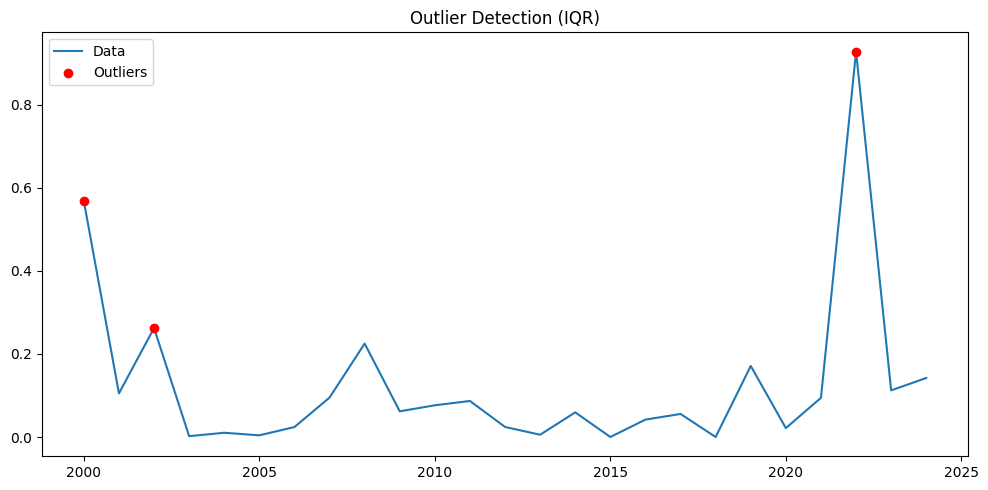

Running grid search...

Best model based on MAE:
changepoint_prior_scale        0.2
n_changepoints                  15
changepoint_range              0.9
holidays_prior_scale          10.0
Model                      Prophet
MAE                         0.0885
RMSE                         0.172
MASE                        0.5768
Coverage_90%                   0.8
n_forecasts                     10
Name: 0, dtype: object

Best Prophet parameters:
{'changepoint_prior_scale': np.float64(0.2), 'n_changepoints': np.int64(15), 'changepoint_range': np.float64(0.9), 'holidays_prior_scale': np.float64(10.0)}
========== PIPELINE FINISHED ==========


In [229]:
south_africa_model = ProphetModel(south_africa)
results = south_africa_model.run_pipeline_prophet(
    param_grid=grid
)

In [230]:
results["cv_results"]


,changepoint_prior_scale,n_changepoints,changepoint_range,holidays_prior_scale,Model,MAE,RMSE,MASE,Coverage_90%,n_forecasts
0,0.20,15,0.9,10.0,Prophet,0.0885,0.1720,0.5768,0.8,10
1,0.10,15,0.9,15.0,Prophet,0.0886,0.1719,0.5770,0.8,10
2,0.20,20,0.9,10.0,Prophet,0.0886,0.1720,0.5774,0.8,10
3,0.20,15,0.8,10.0,Prophet,0.0886,0.1718,0.5772,0.8,10
4,0.20,15,0.9,15.0,Prophet,0.0886,0.1720,0.5771,0.8,10
5,0.20,25,0.9,10.0,Prophet,0.0886,0.1720,0.5774,0.8,10
6,0.30,15,0.9,10.0,Prophet,0.0886,0.1718,0.5774,0.8,10
7,0.05,15,0.9,15.0,Prophet,0.0887,0.1717,0.5778,0.8,10
8,0.10,20,0.9,15.0,Prophet,0.0887,0.1719,0.5778,0.8,10
9,0.10,20,0.9,10.0,Prophet,0.0887,0.1721,0.5779,0.8,10


In [231]:
results["best_params"]


{'changepoint_prior_scale': np.float64(0.2),
 'n_changepoints': np.int64(15),
 'changepoint_range': np.float64(0.9),
 'holidays_prior_scale': np.float64(10.0)}

In [232]:
results["best_model_summary"]


,changepoint_prior_scale,n_changepoints,changepoint_range,holidays_prior_scale,Model,MAE,RMSE,MASE,Coverage_90%,n_forecasts
0,0.2,15,0.9,10.0,Prophet,0.0885,0.172,0.5768,0.8,10


## 4.14. Kenya

In [233]:
kenya = prepare_level_data(df, level='country', filter='Kenya')
kenya

,Year,Total_Deaths,Population,Mortality_Rate
0,2000,50.0,30642890.0,0.163170
1,2001,40.0,31619170.0,0.126506
2,2002,101.0,32629808.0,0.309533
3,2003,40.0,33652223.0,0.118863
4,2004,143.0,34713455.0,0.411944
5,2005,106.0,35796484.0,0.296118
6,2006,395.0,36904008.0,1.070344
7,2007,39.0,38036349.0,0.102534
8,2008,112.0,39206351.0,0.285668
9,2009,307.0,40408891.0,0.759734


========== PROPHET PIPELINE START ==========
Detected outlier years: [2006]


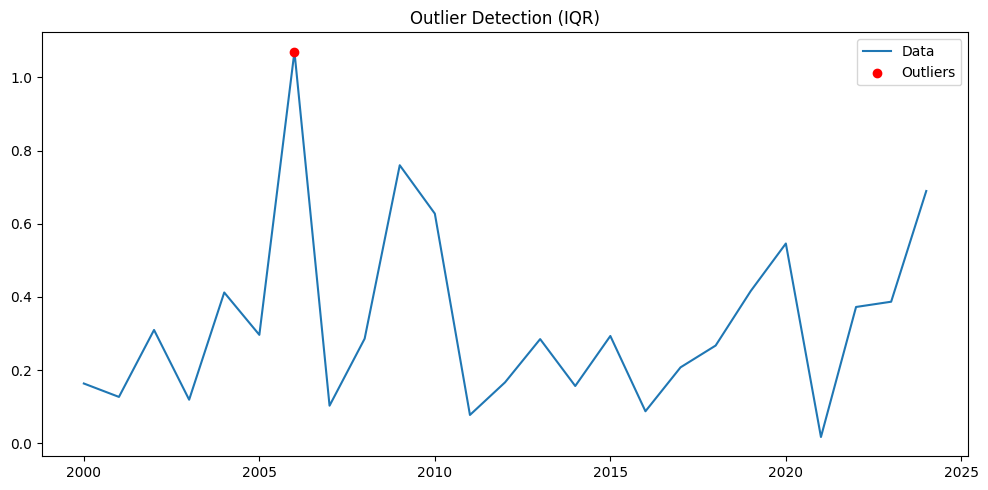

Running grid search...

Best model based on MAE:
changepoint_prior_scale        0.1
n_changepoints                  15
changepoint_range              0.8
holidays_prior_scale          10.0
Model                      Prophet
MAE                          0.161
RMSE                        0.2013
MASE                        0.6194
Coverage_90%                   0.8
n_forecasts                     10
Name: 0, dtype: object

Best Prophet parameters:
{'changepoint_prior_scale': np.float64(0.1), 'n_changepoints': np.int64(15), 'changepoint_range': np.float64(0.8), 'holidays_prior_scale': np.float64(10.0)}
========== PIPELINE FINISHED ==========


In [234]:
kenya_model = ProphetModel(kenya)
results = kenya_model.run_pipeline_prophet(
    param_grid=grid
)

In [235]:
results["cv_results"]


,changepoint_prior_scale,n_changepoints,changepoint_range,holidays_prior_scale,Model,MAE,RMSE,MASE,Coverage_90%,n_forecasts
0,0.10,15,0.8,10.0,Prophet,0.1610,0.2013,0.6194,0.8,10
1,0.20,15,0.9,10.0,Prophet,0.1611,0.2013,0.6198,0.8,10
2,0.10,25,0.8,10.0,Prophet,0.1611,0.2013,0.6196,0.8,10
3,0.10,20,0.8,10.0,Prophet,0.1611,0.2013,0.6196,0.8,10
4,0.10,25,0.9,10.0,Prophet,0.1612,0.2014,0.6201,0.8,10
5,0.20,20,0.8,15.0,Prophet,0.1612,0.2014,0.6202,0.8,10
6,0.10,20,0.9,10.0,Prophet,0.1612,0.2014,0.6201,0.8,10
7,0.20,25,0.8,15.0,Prophet,0.1612,0.2014,0.6202,0.8,10
8,0.20,15,0.8,15.0,Prophet,0.1613,0.2016,0.6206,0.8,10
9,0.20,15,0.8,10.0,Prophet,0.1613,0.2016,0.6206,0.8,10


In [236]:
results["best_params"]


{'changepoint_prior_scale': np.float64(0.1),
 'n_changepoints': np.int64(15),
 'changepoint_range': np.float64(0.8),
 'holidays_prior_scale': np.float64(10.0)}

In [237]:
results["best_model_summary"]


,changepoint_prior_scale,n_changepoints,changepoint_range,holidays_prior_scale,Model,MAE,RMSE,MASE,Coverage_90%,n_forecasts
0,0.1,15,0.8,10.0,Prophet,0.161,0.2013,0.6194,0.8,10
